## Data_Preprocessing_feature_selection



> 1. Drop all non numeric data 
> 2. Drop feature containing '$' in the first position
> 3. Drop all constant features
> 4. dataFrame standardization 
    - save the dataframe to csv : standardized_df.csv 
> 5. Data Visualization
> 6. Principal Component Analysis (PCA)
     - on the scaled dataframe (df3) - save the dataframe to csv : df_pca.csv
> 7. SelectKbest
    -  on the scaled dataframe (df3) - save to csv : df_SelectKBest.csv  
>
> 8. drop highly correlated features (> 0.95)  
> 9. Find outliers 
> 10. correlation with output
> 11. Forward Selection
> 12. Random Forest Regression Feature Importance (first 30)
> 13. Backward Feature Elimination
    

In [1]:
#!/usr/bin/python3
# coding=utf-8

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, RFE 
from sklearn.model_selection import KFold, cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, ElasticNetCV, LassoCV, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
#import pandas_profiling

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, make_scorer
from random import randint

from IPython.display import display, Markdown
from platform import python_version

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline





In [3]:
display(Markdown('### my python_version = 3.9.12 , Pandas_version = 1.2.4'))

print('python_version \t :', python_version())
print('Pandas_version \t :', pd. __version__ )

### my python_version = 3.9.12 , Pandas_version = 1.2.4

python_version 	 : 3.9.12
Pandas_version 	 : 1.4.2


In [4]:
#Import data to pandas dataframe and set the first column as index
df = pd.read_excel ('data/milk_plasma_all_data_mrg_020821.xlsx')
df.set_index('index', inplace=True)
df.describe()

,conc,ENV_CHEM,MP_RATIO,Log_MP_RATIO,$DIVPRIO,apol,ASA,ASA+,ASA-,ASA_H,...,weinerPol,zagreb,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,94.457517,0.606557,2.471367,0.064355,95.841530,43.101909,515.701000,242.645919,270.672053,403.884078,...,33.726776,105.693989,0.149404,-0.300480,0.053206,0.084174,0.606557,0.196721,0.393443,0.590164
std,11.244688,0.489854,2.807868,0.646852,58.355127,14.711291,108.701072,148.373315,124.829085,134.994054,...,15.233411,37.591125,0.634315,0.429151,0.506946,0.534768,0.489854,0.398610,0.489854,0.630116
min,44.544422,0.000000,0.005500,-2.259637,1.000000,8.322758,197.574580,0.000000,64.410759,0.000000,...,0.000000,6.000000,-2.568591,-1.423822,-1.253899,-1.423822,0.000000,0.000000,0.000000,0.000000
25%,96.876785,0.000000,0.570000,-0.244192,46.500000,35.353966,467.002060,103.082525,170.508665,313.639420,...,25.000000,86.000000,-0.148957,-0.537066,-0.233913,-0.247966,0.000000,0.000000,0.000000,0.000000
50%,99.761139,1.000000,1.249159,0.096618,92.000000,39.893585,502.726960,246.916580,237.202330,437.151890,...,31.000000,100.000000,0.319691,-0.375190,0.147322,0.122110,1.000000,0.000000,0.000000,1.000000
75%,100.000000,1.000000,3.643238,0.561488,137.500000,49.712860,559.477875,360.791610,374.248900,500.089340,...,39.000000,122.000000,0.560284,0.029467,0.454164,0.508073,1.000000,0.000000,1.000000,1.000000
max,100.000000,1.000000,20.466232,1.311038,184.000000,126.062750,1094.164700,794.894100,625.281980,725.847960,...,113.000000,320.000000,1.986463,0.773092,0.983590,1.035515,1.000000,1.000000,1.000000,2.000000


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 183
Columns: 496 entries, smiles to set
dtypes: float64(272), int64(219), object(5)
memory usage: 710.6+ KB


In [6]:
df_columns = df.columns
df_columns

Index(['smiles', 'conc', 'name', 'CLASS', 'ENV_CHEM', 'MP_RATIO',
       'Log_MP_RATIO', 'FP:MACCS', '$DIVPRIO', 'apol',
       ...
       'zagreb', '$PRED_neutral_model_7', '$PRED_ionized_model_516',
       '$PRED_charged_and_3d_model1', '$PREDCOMP', 'neutral', 'TEST',
       'CHARGED', 'group', 'set'],
      dtype='object', length=496)

In [7]:
df.head(3)

,smiles,conc,name,CLASS,ENV_CHEM,MP_RATIO,Log_MP_RATIO,FP:MACCS,$DIVPRIO,apol,...,zagreb,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group,set
index,,,,,,,,,,,,,,,,,,,,,
1,O=C(Nc1ccc(O)cc1)C,99.679085,Acetaminophen,DRUG,1,0.76,-0.119186,92 110 113 117 131 133 135 139 143 151 152 154...,1,22.785137,...,50,-0.246018,-0.198971,-0.338185,-0.246018,1,0,0,0,TRAINING
2,O(CCO)Cn1c2N=C(N)NC(=O)c2nc1,86.215294,Acyclovir,DRUG,1,2.65,0.423246,25 28 38 43 65 72 75 77 78 79 80 82 83 84 85 8...,73,29.320723,...,80,0.274696,0.252062,0.017201,0.274696,1,0,0,0,TRAINING
3,Clc1cc2C(c3ccccc3)=NCc3n(c(C)nn3)-c2cc1,97.833694,Alprazolam,DRUG,1,0.36,-0.443698,19 38 52 62 65 77 78 79 80 83 85 87 94 96 100 ...,66,45.168308,...,122,-0.474589,-0.314985,-0.465988,-0.474589,1,0,0,0,TRAINING


In [8]:
#find all rows with NaN in entire DataFrame (df)
nan_values = df[df.isna().any(axis=1)]
null_values = df[df.isnull().any(axis=1)]
#number of NAN and null values
len(nan_values), len(null_values) 

(0, 0)

In [9]:
# drop the column 'MP_RATIO' (we need only one output/y variable) and place the 'Log_MP_RATIO' as the last column in the dataframe

df=df.drop(columns=['MP_RATIO','Log_MP_RATIO']).assign(Log_MP_RATIO=df['Log_MP_RATIO'])

df

,smiles,conc,name,CLASS,ENV_CHEM,FP:MACCS,$DIVPRIO,apol,ASA,ASA+,...,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,neutral,TEST,CHARGED,group,set,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,O=C(Nc1ccc(O)cc1)C,99.679085,Acetaminophen,DRUG,1,92 110 113 117 131 133 135 139 143 151 152 154...,1,22.785137,341.43088,196.220180,...,-0.246018,-0.198971,-0.338185,-0.246018,1,0,0,0,TRAINING,-0.119186
2,O(CCO)Cn1c2N=C(N)NC(=O)c2nc1,86.215294,Acyclovir,DRUG,1,25 28 38 43 65 72 75 77 78 79 80 82 83 84 85 8...,73,29.320723,431.48679,317.577730,...,0.274696,0.252062,0.017201,0.274696,1,0,0,0,TRAINING,0.423246
3,Clc1cc2C(c3ccccc3)=NCc3n(c(C)nn3)-c2cc1,97.833694,Alprazolam,DRUG,1,19 38 52 62 65 77 78 79 80 83 85 87 94 96 100 ...,66,45.168308,512.07532,248.789260,...,-0.474589,-0.314985,-0.465988,-0.474589,1,0,0,0,TRAINING,-0.443698
4,[N+H3]C(Cc1ccccc1)C,99.669838,Amphetamine,DRUG,1,49 84 104 111 115 151 155 156 158 160 161 162 ...,9,26.275103,349.46716,242.228820,...,0.411452,0.465482,0.167944,0.465482,0,0,1,1,TRAINING,0.711807
5,O=C(N[C@@H]1C(=O)N2[C@@H](C(=O)[O-])C(C)(C)S[C...,79.510864,Ampicillin,DRUG,1,8 11 19 36 47 49 54 66 74 79 81 83 84 85 88 92...,16,49.570274,561.79968,267.192260,...,-0.879331,-0.344795,-0.708340,-0.344795,0,1,1,2,TRAINING,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,O=C(N)c1c(O)ccc(C(O)C[N+H2]C(CCc2ccccc2)C)c1,55.552212,labetalol,DRUG,1,49 53 54 82 84 89 90 92 95 97 100 104 110 111 ...,79,54.715824,628.47516,413.561190,...,-0.467125,0.162852,0.130214,0.162852,0,0,1,1,TRAINING,0.176091
180,ClC(Cl)(Cl)C(c1c(Cl)cccc1)c1ccc(Cl)cc1,100.000000,op-DDT,ENV,0,87 103 106 107 112 125 134 144 145 150 162 163...,61,41.541138,490.29086,142.239910,...,0.353390,-0.868373,0.323759,0.353390,1,0,0,0,TRAINING,0.472628
181,ClC(Cl)=C(c1ccc(Cl)cc1)c1ccc(Cl)cc1,100.000000,pp-DDE,ENV,0,21 50 76 87 99 103 107 125 134 145 162 163 165,14,38.694344,498.58255,141.864210,...,0.391826,-0.630014,0.152654,0.391826,1,0,0,0,TRAINING,0.667194


## 1. Drop all non numeric data

In [10]:
#Identify  non numeric columns
NonNumericCols = (df.select_dtypes(exclude='number')).columns
NonNumericCols


Index(['smiles', 'name', 'CLASS', 'FP:MACCS', 'set'], dtype='object')

In [11]:
#we need to store the 'set' column to split the data later 
df_set = df['set']
df_output = df['Log_MP_RATIO']
df_set

index
1      TRAINING
2      TRAINING
3      TRAINING
4      TRAINING
5      TRAINING
         ...   
179    TRAINING
180    TRAINING
181    TRAINING
182    TRAINING
183    TRAINING
Name: set, Length: 183, dtype: object

In [12]:
# Drop non numeric columns
df=df.drop(columns=NonNumericCols)

In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 183
Columns: 490 entries, conc to Log_MP_RATIO
dtypes: float64(271), int64(219)
memory usage: 702.0 KB


In [14]:
len(df.Log_MP_RATIO.value_counts())

166

##  2.  Drop feature containing \'$' in the first position
    save DtaFrame to df1

In [15]:
#list of all the column names  containing '$' in the first position
cols_dollar_signe = [c for c in df.columns if c[0] == '$']

print(str(len(cols_dollar_signe)),'columns with $ signe : \n',cols_dollar_signe)

5 columns with $ signe : 
 ['$DIVPRIO', '$PRED_neutral_model_7', '$PRED_ionized_model_516', '$PRED_charged_and_3d_model1', '$PREDCOMP']


In [16]:
df_cols_dollar_signe = df[cols_dollar_signe].join(df_output)
df_cols_dollar_signe

,$DIVPRIO,$PRED_neutral_model_7,$PRED_ionized_model_516,$PRED_charged_and_3d_model1,$PREDCOMP,Log_MP_RATIO
index,,,,,,
1,1,-0.246018,-0.198971,-0.338185,-0.246018,-0.119186
2,73,0.274696,0.252062,0.017201,0.274696,0.423246
3,66,-0.474589,-0.314985,-0.465988,-0.474589,-0.443698
4,9,0.411452,0.465482,0.167944,0.465482,0.711807
5,16,-0.879331,-0.344795,-0.708340,-0.344795,-0.530178
...,...,...,...,...,...,...
179,79,-0.467125,0.162852,0.130214,0.162852,0.176091
180,61,0.353390,-0.868373,0.323759,0.353390,0.472628
181,14,0.391826,-0.630014,0.152654,0.391826,0.667194


In [17]:
df_cols_dollar_signeToCsv = df_cols_dollar_signe.join(df_set)
df_cols_dollar_signeToCsv.to_csv('df_cols_dollar_signe.csv', encoding='utf-8')

In [18]:
#Drop the columns starting with $

df1=df.drop(cols_dollar_signe, axis=1)
df1

,conc,ENV_CHEM,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,...,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,22.785137,341.43088,196.220180,145.21069,239.01727,102.413610,2,0,...,0.00,151.16499,166,11,50,1,0,0,0,-0.119186
2,86.215294,1,29.320723,431.48679,317.577730,113.90907,183.97377,247.513000,5,0,...,1.25,225.20799,453,22,80,1,0,0,0,0.423246
3,97.833694,1,45.168308,512.07532,248.789260,263.28607,438.28427,73.791069,3,0,...,0.00,308.77200,926,40,122,1,0,0,0,-0.443698
4,99.669838,1,26.275103,349.46716,242.228820,107.23836,264.31046,85.156723,0,0,...,0.00,136.21800,126,9,44,0,0,1,1,0.711807
5,79.510864,1,49.570274,561.79968,267.192260,262.83469,309.97708,251.822590,3,2,...,0.00,348.40298,1365,39,132,0,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,54.715824,628.47516,413.561190,214.91400,414.99454,213.480650,3,0,...,0.00,329.41998,1607,33,116,0,0,1,1,0.176091
180,100.000000,0,41.541138,490.29086,142.239910,348.05093,352.38516,137.905700,0,0,...,0.00,354.49100,654,29,98,1,0,0,0,0.472628
181,100.000000,0,38.694344,498.58255,141.864210,356.71835,494.35355,4.229017,0,0,...,0.00,318.03000,603,26,90,1,0,0,0,0.667194


In [19]:
# #save df1 to csv
# dfToCsv = df1.join(df_set)
# dfToCsv.to_csv('df1_clean.csv', encoding='utf-8')

## List of important descriptors from Table 5 in Materials and Methods . 

In [20]:
# Molecular QSAR Descriptors Important for Predicting Milk:Serum Partitioning.

important_descriptors = ['DASA', 'h_logS','ASA-', 'ASA_H', 'Weight', 'a_acc', 'b_1rotN', 'h_logP', 'CASA-', 'FCASA+','h_ema', 'h_mr', 'GCUT_PEOE_1', 'GCUT_SLOGP_2' ,'KierFlex', 'vsurf_DD13', 'density', 'SMR_VSA2', 'SMR_VSA7', 'MACCS(-50)','vsurf_D4', 'GCUT_SMR_2', 'b_rotR']
print(len(important_descriptors), 'Molecular QSAR Descriptors Important for Predicting Milk:Serum Partitioning \n \n' , important_descriptors)


23 Molecular QSAR Descriptors Important for Predicting Milk:Serum Partitioning 
 
 ['DASA', 'h_logS', 'ASA-', 'ASA_H', 'Weight', 'a_acc', 'b_1rotN', 'h_logP', 'CASA-', 'FCASA+', 'h_ema', 'h_mr', 'GCUT_PEOE_1', 'GCUT_SLOGP_2', 'KierFlex', 'vsurf_DD13', 'density', 'SMR_VSA2', 'SMR_VSA7', 'MACCS(-50)', 'vsurf_D4', 'GCUT_SMR_2', 'b_rotR']


In [21]:
# check if all important_descriptors are present in df
i = 0 
missing = []
for descrtor in important_descriptors:
    if descrtor not in df1.columns:
        i+=1
        missing.append(descrtor)
print(i, missing, 'missing from df')

0 [] missing from df


In [22]:
X_important_descriptors = df[important_descriptors]
df_important_descriptors = X_important_descriptors.join(df_output)

df_important_descriptors

,DASA,h_logS,ASA-,ASA_H,Weight,a_acc,b_1rotN,h_logP,CASA-,FCASA+,...,KierFlex,vsurf_DD13,density,SMR_VSA2,SMR_VSA7,MACCS(-50),vsurf_D4,GCUT_SMR_2,b_rotR,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,51.009487,-1.473223,145.21069,239.01727,151.16499,2,1,1.088146,352.57156,1.395945,...,1.503828,6.576473,0.742036,0.000000,33.326015,0,162.125,0.206710,0.181818,-0.119186
2,203.668660,-0.556664,113.90907,183.97377,225.20799,5,4,-1.669814,491.74542,3.177347,...,2.109547,0.500000,0.853826,18.010750,0.000000,0,129.875,0.174109,0.235294,0.423246
3,14.496816,-5.238906,263.28607,438.28427,308.77200,3,1,3.701848,745.62616,1.376399,...,2.358810,0.866025,0.772703,0.000000,72.474655,0,337.000,0.205528,0.040000,-0.443698
4,134.990460,0.935879,107.23836,264.31046,136.21800,0,2,-3.046292,214.79842,2.081492,...,1.853780,0.707107,0.617172,32.897186,33.326015,0,201.375,0.169076,0.200000,0.711807
5,4.357579,-3.348349,262.83469,309.97708,348.40298,3,4,0.415558,1837.47730,2.848848,...,3.599823,0.500000,0.821163,18.010750,98.871574,0,220.375,0.194394,0.192308,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,198.647170,-1.234429,214.91400,414.99454,329.41998,3,8,-1.446789,1158.60140,4.206185,...,4.946094,0.500000,0.704018,0.000000,33.326015,0,331.125,0.193051,0.320000,0.176091
180,205.811040,-6.720540,348.05093,352.38516,354.49100,0,2,7.081489,943.91418,0.786497,...,6.354181,0.500000,0.951700,0.000000,195.743230,0,378.250,0.425300,0.150000,0.472628
181,214.854140,-6.688584,356.71835,494.35355,318.03000,0,2,7.184247,674.55438,0.537771,...,5.160360,6.500000,0.907039,3.185575,156.594570,1,390.000,0.408469,0.105263,0.667194


In [23]:
#save df_important_descriptors to csv
dfToCsv = df_important_descriptors.join(df_set)
dfToCsv.to_csv('df_important_descriptors.csv', encoding='utf-8')

In [24]:
def save_df(filename, df, df_set):
    dfToCsv = df.join(df_set)
    dfToCsv.to_csv('{filename}.csv', encoding='utf-8')
    

## 3. Drop all constant features
    save DataFrame to df2

In [25]:
#Get all columns with constant value (variance = zero) in df1
df_var = df1.var(axis=0)
nb_var_zero=0
listParamsVarZero=[]
for index, value in df_var.items():
    if value == 0:
        nb_var_zero+= 1                # nomble de descripteur constant
        listParamsVarZero.append(index) #liste des descripteurs constant
print('Number of descriptor with constant value = '+ str(nb_var_zero)+'\n')
print(listParamsVarZero)

Number of descriptor with constant value = 30

['a_nB', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-68)', 'MACCS(166)', 'nmol']


In [26]:
#drop constant descriptor
df2=df1.drop(columns=listParamsVarZero)
df2.shape  

(183, 455)

In [27]:
df2 

,conc,ENV_CHEM,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,...,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb,neutral,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,22.785137,341.43088,196.220180,145.21069,239.01727,102.413610,2,0,...,0.00,151.16499,166,11,50,1,0,0,0,-0.119186
2,86.215294,1,29.320723,431.48679,317.577730,113.90907,183.97377,247.513000,5,0,...,1.25,225.20799,453,22,80,1,0,0,0,0.423246
3,97.833694,1,45.168308,512.07532,248.789260,263.28607,438.28427,73.791069,3,0,...,0.00,308.77200,926,40,122,1,0,0,0,-0.443698
4,99.669838,1,26.275103,349.46716,242.228820,107.23836,264.31046,85.156723,0,0,...,0.00,136.21800,126,9,44,0,0,1,1,0.711807
5,79.510864,1,49.570274,561.79968,267.192260,262.83469,309.97708,251.822590,3,2,...,0.00,348.40298,1365,39,132,0,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,54.715824,628.47516,413.561190,214.91400,414.99454,213.480650,3,0,...,0.00,329.41998,1607,33,116,0,0,1,1,0.176091
180,100.000000,0,41.541138,490.29086,142.239910,348.05093,352.38516,137.905700,0,0,...,0.00,354.49100,654,29,98,1,0,0,0,0.472628
181,100.000000,0,38.694344,498.58255,141.864210,356.71835,494.35355,4.229017,0,0,...,0.00,318.03000,603,26,90,1,0,0,0,0.667194


In [28]:
# save df2 
save_df('df2', df2, df_set)

## 9. Find highly correlated features (> 0.95)

    * One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other
    * save the dataframe to df4 and csv : drop_correlated_features.csv

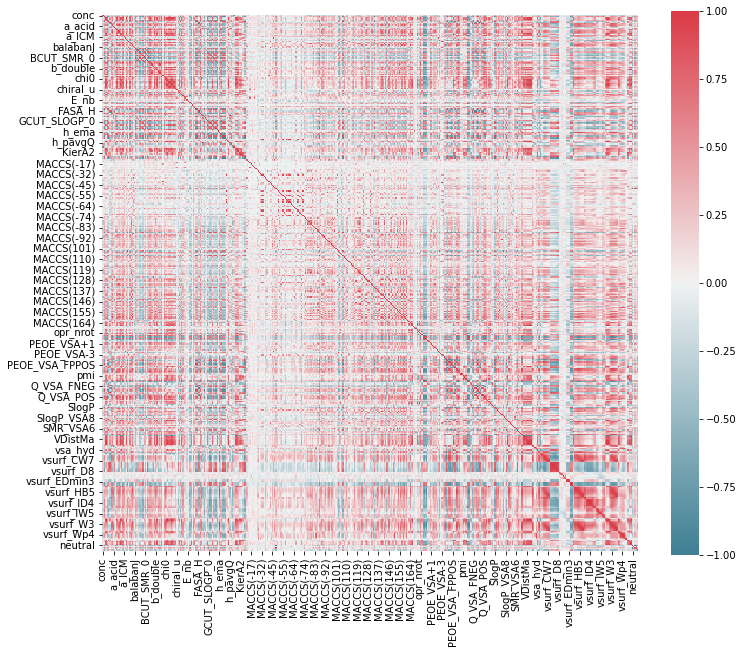

In [29]:
# function to create correlation matrix plot using Pearson Correlation
def corr_matrix_plot(df):
    f, ax = plt.subplots(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr),
                cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    

corr_matrix_plot(df2)


In [30]:
# https://github.com/adityav95/variable_reduction_correlation/blob/master/variable_reduction_by_correlation.ipynb
# Cross-correlation (dropping by mean correlation with all features)


""" The function retuns a list of features to be dropped from the input features.

INPUTS:
1. df_input: n input features (pandas dataframe)
2. corr_coeff: Coefficient threshold (absolute value, no negatives) for a pair of variables above
   which one of the two will be dropped
3. plot: If set to 1 a plot will be displayed showing a heatmap of the cross-correlation between variables 
4. savefile: If set to 1, all relevant files will be saved

PLEASE NOTE:
- The dataframe df_input (should contain only the n input features i.e. no ID and targets) 

SUMMARY OF LOGIC:
1. The n input variables are taken and a n X n matrix of correlation is created (these are absolute values
   i.e. a correlation of -0.8 is treated as 0.8)
2. Variable pairs with correlation higher than the corr_coeff threshold are picked and one of 
   the two variables will be dropped
3. Which of the two will be dropped is based on the one having lower mean absolute correlation with 
   all other variables 

SAVED FILES:
If savefile is set to 1. Saved under current directory under cross_corr_target under folder with a 
   UTC timestamp.
1. A PDF heatmap representing the cross correlation between all the input features
2. A CSV of the matrix containing the values used for the heatmap
3. A CSV of the list of variables to be dropped
"""
def cross_corr_mean(df_input, corr_coeff=0.95, plot=0, savefile=0):
    # Pre-processing
    if savefile == 1:
        from datetime import datetime
        time = str(datetime.utcnow())
        import os
        path = str(os.getcwd()) + "/cross_corr_mean/" + str(time[0:19].replace(':',"-")) + "/"
        os.makedirs(path)

    # Generating correlation matrix of input features
    corr_matrix = df_input.corr(method = 'pearson') # For more info on the methods please refer to https://www.kaggle.com/kiyoung1027/correlation-pearson-spearman-and-kendall

    # Plotting cross correlation matrix
    if plot == 1:
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(10,8))
        sns.heatmap(corr_matrix.round(2), cmap=plt.cm.Blues)
        fig = plt.gcf()
        plt.show()
        if savefile == 1:
            fig.savefig(path + "cross_corr_heatmap.pdf")

    # Generating correlation with the target
    corr_mean = abs(corr_matrix).mean()

    # Saving files
    if savefile ==1:
        corr_matrix.to_csv(path + "cross_corr.csv")
        corr_mean.to_csv(path + "corr_abs_mean.csv")

    # Preparing data
    features_drop_list = [] # This will contain the list of features to be dropped
    features_index_drop_list = [] # This will contain the index of features to be dropped as per df_input
    corr_matrix = abs(corr_matrix)

    # Selecting features to be dropped (Using two for loops that runs on one triangle of the corr_matrix to avoid checking the correlation of a variable with itself)
    for i in range(corr_matrix.shape[0]):
        for j in range(i+1,corr_matrix.shape[0]):

            # The following if statement checks if each correlation value is higher than threshold (or equal) and also ensures the two columns have NOT been dropped already.  
            if corr_matrix.iloc[i,j]>=corr_coeff and i not in features_index_drop_list and j not in features_index_drop_list:

                # The following if statement checks which of the 2 variables with high correlation has a lower correlation with target and then drops it. If equal we can drop any and it drops the first one (This is arbitrary)
                if corr_mean[corr_matrix.columns[i]] >= corr_mean[corr_matrix.columns[j]]:
                    features_drop_list.append(corr_matrix.columns[i])	# Name of variable that needs to be dropped appended to list
                    features_index_drop_list.append(i)	# Index of variable that needs to be dropped appended to list. This is used to not check for the same variables repeatedly
                else:
                    features_drop_list.append(corr_matrix.columns[j])
                    features_index_drop_list.append(j)

    # Saving final list
    if savefile ==1:
        pd.Series(features_drop_list).to_csv(path + "features_drop_list.csv")

    return features_drop_list

In [31]:
df_input = df2.drop(columns=['Log_MP_RATIO'])
dropList=cross_corr_mean(df_input)
print(len(dropList), dropList)

123 ['apol', 'ASA', 'FCASA+', 'Q_VSA_POS', 'Q_VSA_HYD', 'a_acc', 'vsa_acid', 'a_aro', 'a_IC', 'bpol', 'a_count', 'a_heavy', 'a_nBr', 'chi0v_C', 'chi0_C', 'a_nCl', 'a_nF', 'a_nN', 'a_nO', 'a_nS', 'BCUT_PEOE_0', 'BCUT_PEOE_3', 'BCUT_SLOGP_0', 'b_rotN', 'b_rotR', 'b_single', 'CASA+', 'b_heavy', 'chi1', 'Kier1', 'chi0', 'chi1v', 'SMR', 'vol', 'vsurf_V', 'chi1v_C', 'diameter', 'E_nb', 'FASA-', 'Q_VSA_FNEG', 'Q_VSA_FPOS', 'FASA_H', 'Q_VSA_FHYD', 'Q_VSA_FPOL', 'h_pavgQ', 'GCUT_PEOE_3', 'GCUT_SMR_3', 'vsurf_HB5', 'h_logD', 'h_logP', 'logS', 'h_log_dbo', 'h_mr', 'h_pstates', 'MACCS(-32)', 'PEOE_VSA-3', 'neutral', 'MACCS(-49)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-56)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-67)', 'MACCS(-88)', 'MACCS(-87)', 'MACCS(107)', 'MACCS(148)', 'MACCS(153)', 'MACCS(146)', 'MACCS(161)', 'MACCS(160)', 'MACCS(164)', 'MACCS(165)', 'vdw_area', 'vdw_vol', 'VSA', 'vsurf_S', 'rings', 'PC+', 'PC-', 'Q_PC-', 'PEOE_VSA_FHYD', 'PEOE_VSA_FNEG', 'vsa_hyd', 'PEOE_VSA_NEG', 'TPSA', 'petitje

In [32]:
#Corr_list_to_drop fuction returns a correlation matrix list between features, to drop
def Corr_list_to_drop(X, corr_poucent):
    corr_matrix = X.corr().abs()  #Calculate the absolute value element-wise
    high_corr_var=np.where(corr_matrix>=corr_poucent)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    #Selecting the Upper trigular matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    
    #select the columns having absolute correlation 
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_poucent)]
    return to_drop




In [33]:
# list of features having 95% corrolation
X_df2 = df2.drop(columns=['Log_MP_RATIO'])
to_drop = Corr_list_to_drop(X_df2,0.95)
print(len(to_drop), to_drop)

130 ['a_donacc', 'a_IC', 'a_nC', 'BCUT_SMR_0', 'BCUT_SMR_3', 'bpol', 'b_ar', 'b_count', 'b_heavy', 'b_rotN', 'b_rotR', 'b_single', 'CASA+', 'chi0', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1_C', 'E_nb', 'FASA-', 'FASA_P', 'FCASA+', 'GCUT_SLOGP_0', 'GCUT_SMR_0', 'GCUT_SMR_3', 'h_logP', 'h_logS', 'h_mr', 'h_pavgQ', 'h_pstrain', 'Kier1', 'logS', 'MACCS(-33)', 'MACCS(-42)', 'MACCS(-46)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-58)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-63)', 'MACCS(-67)', 'MACCS(-73)', 'MACCS(-81)', 'MACCS(-88)', 'MACCS(103)', 'MACCS(107)', 'MACCS(134)', 'MACCS(142)', 'MACCS(146)', 'MACCS(148)', 'MACCS(153)', 'MACCS(159)', 'MACCS(160)', 'MACCS(161)', 'MACCS(164)', 'mr', 'opr_brigid', 'PEOE_PC-', 'PEOE_VSA-3', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPOS', 'PEOE_VSA_POS', 'petitjeanSC', 'pmi2', 'pmi3', 'Q_PC+', 'Q_PC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG', 'Q_VSA_FPOL', 'Q_VSA_FPOS', 'Q_VSA_HYD', 'Q_VSA_NEG', 'Q_VSA_POS', 'radius', 'rings', 'RPC+', 'RPC-', 'SlogP', 'SMR', 'SMR_VSA6', 'TPSA', 'VAdjMa

In [34]:
# function to return a list of commun elements between 2 lists
def communElem(list1, list2):  
    communElem = []
    print(len(list1), ' elements in the first list')
    print(len(list2), ' elements in the first list')
    for elem in list1:
        if elem in list2:
            communElem.append(elem)
    return communElem
      
print(len(communElem(dropList,to_drop)), communElem(dropList,to_drop))

123  elements in the first list
130  elements in the first list
123  elements in the first list
130  elements in the first list
82 ['FCASA+', 'Q_VSA_POS', 'Q_VSA_HYD', 'vsa_acid', 'a_IC', 'bpol', 'chi0v_C', 'chi0_C', 'b_rotN', 'b_rotR', 'b_single', 'CASA+', 'b_heavy', 'chi1', 'Kier1', 'chi0', 'chi1v', 'SMR', 'vol', 'vsurf_V', 'E_nb', 'FASA-', 'Q_VSA_FNEG', 'Q_VSA_FPOS', 'Q_VSA_FHYD', 'Q_VSA_FPOL', 'h_pavgQ', 'GCUT_SMR_3', 'vsurf_HB5', 'h_logP', 'logS', 'h_mr', 'PEOE_VSA-3', 'neutral', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-67)', 'MACCS(-88)', 'MACCS(107)', 'MACCS(148)', 'MACCS(153)', 'MACCS(146)', 'MACCS(161)', 'MACCS(160)', 'MACCS(164)', 'vdw_area', 'vdw_vol', 'VSA', 'vsurf_S', 'rings', 'Q_PC-', 'vsa_hyd', 'TPSA', 'petitjeanSC', 'pmi3', 'VDistMa', 'vsurf_W4', 'vsa_pol', 'vsurf_CW5', 'vsurf_D2', 'vsurf_D4', 'vsurf_D5', 'vsurf_D6', 'vsurf_D7', 'vsurf_EDmin2', 'vsurf_EDmin3', 'vsurf_EWmin2', 'vsurf_EWmin3', 'vsurf_HB2', 'vsurf_HB4', 'vsurf_W3', 'vsurf_HB6', 'vsur

In [35]:
print(len(communElem(dropList,to_drop)), communElem(dropList,to_drop))

123  elements in the first list
130  elements in the first list
123  elements in the first list
130  elements in the first list
82 ['FCASA+', 'Q_VSA_POS', 'Q_VSA_HYD', 'vsa_acid', 'a_IC', 'bpol', 'chi0v_C', 'chi0_C', 'b_rotN', 'b_rotR', 'b_single', 'CASA+', 'b_heavy', 'chi1', 'Kier1', 'chi0', 'chi1v', 'SMR', 'vol', 'vsurf_V', 'E_nb', 'FASA-', 'Q_VSA_FNEG', 'Q_VSA_FPOS', 'Q_VSA_FHYD', 'Q_VSA_FPOL', 'h_pavgQ', 'GCUT_SMR_3', 'vsurf_HB5', 'h_logP', 'logS', 'h_mr', 'PEOE_VSA-3', 'neutral', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-67)', 'MACCS(-88)', 'MACCS(107)', 'MACCS(148)', 'MACCS(153)', 'MACCS(146)', 'MACCS(161)', 'MACCS(160)', 'MACCS(164)', 'vdw_area', 'vdw_vol', 'VSA', 'vsurf_S', 'rings', 'Q_PC-', 'vsa_hyd', 'TPSA', 'petitjeanSC', 'pmi3', 'VDistMa', 'vsurf_W4', 'vsa_pol', 'vsurf_CW5', 'vsurf_D2', 'vsurf_D4', 'vsurf_D5', 'vsurf_D6', 'vsurf_D7', 'vsurf_EDmin2', 'vsurf_EDmin3', 'vsurf_EWmin2', 'vsurf_EWmin3', 'vsurf_HB2', 'vsurf_HB4', 'vsurf_W3', 'vsurf_HB6', 'vsur

In [36]:
 #https://likegeeks.com/python-correlation-matrix/
#Sorting the correlation matrix
    #1. convert the given matrix into a one-dimensional Series of values.
correlation_mat = df2.corr().abs()

print('____________________________')
corr_pairs = correlation_mat.unstack()

print(corr_pairs.shape)

    #2. sort the values using the sort_values() 
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print('____________________________')
print(sorted_pairs)







____________________________
(207025,)
____________________________
BCUT_SMR_1    vsurf_CW3       0.000001
vsurf_CW3     BCUT_SMR_1      0.000001
KierFlex      MACCS(160)      0.000009
MACCS(160)    KierFlex        0.000009
MACCS(-52)    MACCS(150)      0.000017
                                ...   
PEOE_VSA_NEG  PEOE_VSA_NEG    1.000000
neutral       MACCS(-49)      1.000000
              CHARGED         1.000000
MACCS(-49)    neutral         1.000000
CHARGED       neutral         1.000000
Length: 207025, dtype: float64


In [37]:
#Corr_list_relevant_features fuction returns a correlation matrix list between features and output, to keep
def Corr_list_with_output(df, target=0.5):
    cor = df.corr()      # Using Pearson Correlation
    cor_target = abs(cor['Log_MP_RATIO'])
    #Selecting highly correlated features
    features = cor_target[cor_target>target]
    return features



In [38]:
relevant_features = Corr_list_with_output(df2).sort_values(kind="quicksort")

print(len(relevant_features) ,'Number of descriptors correlated with y to keep','\n', relevant_features)

38 Number of descriptors correlated with y to keep 
 vsurf_W4          0.500097
a_acid            0.500293
E_sol             0.502328
vsurf_ID1         0.503618
vsurf_ID2         0.504370
h_ema             0.505217
vsurf_HB5         0.505374
vsurf_CW4         0.507663
vsa_acid          0.510706
vsurf_HB6         0.510886
vsurf_W5          0.511460
vsurf_W6          0.513319
PEOE_VSA_FHYD     0.516797
PEOE_VSA_FPOL     0.516797
GCUT_SMR_2        0.520091
vsurf_CW5         0.522737
MACCS(134)        0.525753
MACCS(-87)        0.526146
TPSA              0.531526
PEOE_VSA_POL      0.535125
vsa_pol           0.537606
vsurf_CW6         0.538361
GCUT_SLOGP_1      0.538647
b_double          0.543089
DASA              0.547024
MACCS(107)        0.552171
SlogP             0.560981
PEOE_VSA_PNEG     0.572234
PEOE_VSA_FPNEG    0.577693
ENV_CHEM          0.582632
vsa_acc           0.584741
vsurf_EWmin2      0.586677
vsurf_EWmin3      0.588231
vsurf_EWmin1      0.590682
SMR_VSA0          0.596317
MA

In [39]:
df_relevant_features=df1[relevant_features.index]
df_relevant_features

,vsurf_W4,a_acid,E_sol,vsurf_ID1,vsurf_ID2,h_ema,vsurf_HB5,vsurf_CW4,vsa_acid,vsurf_HB6,...,PEOE_VSA_FPNEG,ENV_CHEM,vsa_acc,vsurf_EWmin2,vsurf_EWmin3,vsurf_EWmin1,SMR_VSA0,MACCS(154),GCUT_SLOGP_2,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,60.125,0,-17.289808,0.534114,0.592329,2.807268,10.000,0.530227,0.000000,-0.375,...,0.129231,1,13.566921,-4.501601,-4.495557,-4.591724,23.862217,1,0.123895,-0.119186
2,207.125,0,-28.662804,0.419048,0.472217,9.401648,69.125,1.170379,0.000000,33.125,...,0.161277,1,27.435829,-7.737467,-7.734310,-7.756833,34.862103,1,0.047797,0.423246
3,89.000,0,-19.286819,1.108302,0.949276,6.998776,40.875,0.398057,0.000000,14.000,...,0.019991,1,24.524654,-5.387553,-5.232655,-5.495107,0.000000,0,0.155151,-0.443698
4,17.875,0,-74.318977,0.957445,0.731199,0.000000,-12.375,0.187871,0.000000,-1.250,...,0.006582,1,0.000000,-3.024735,-2.995125,-3.044288,0.000000,0,0.142107,0.711807
5,224.375,2,-111.944730,1.564881,1.545264,12.811975,81.125,0.980341,27.133842,36.125,...,0.186829,1,54.267685,-7.296841,-7.204403,-7.492854,114.269990,3,0.109960,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,133.250,0,-73.292038,1.636585,1.479004,3.944437,37.000,0.540022,0.000000,20.625,...,0.100604,1,13.566921,-6.865585,-6.721995,-7.182785,23.862217,1,0.145267,0.176091
180,0.000,0,-5.243302,0.245388,0.213638,1.397877,0.000,0.000000,0.000000,0.000,...,0.000000,0,0.000000,-1.898758,-1.893961,-1.908710,0.000000,0,0.481420,0.472628
181,0.000,0,-2.048312,0.165911,0.147808,0.884502,0.000,0.000000,0.000000,0.000,...,0.000000,0,0.000000,-1.663281,-1.649255,-1.703724,0.000000,0,0.409728,0.667194


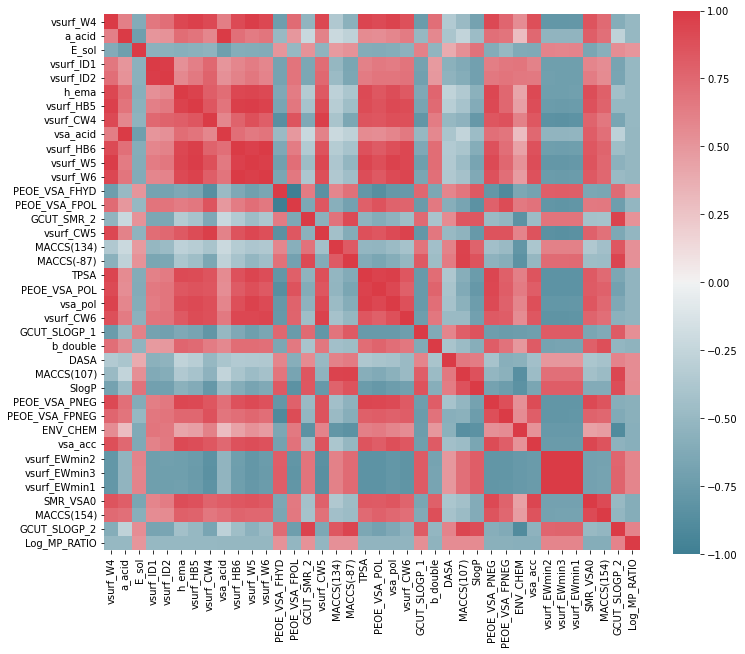

In [40]:
# df_relevant_features corrolation plot
corr_matrix_plot(df_relevant_features)

In [41]:
# list of features corrolated with output corrolated with each other to drop
df_input_corrWithOutput = df_relevant_features.drop(columns=['Log_MP_RATIO'])
dropList_corrWithOutput=cross_corr_mean(df_input_corrWithOutput)
print(len(dropList_corrWithOutput), dropList_corrWithOutput)

13 ['vsurf_W4', 'vsa_acid', 'vsurf_ID2', 'vsurf_HB5', 'vsurf_CW5', 'vsurf_W5', 'vsurf_W6', 'PEOE_VSA_FHYD', 'MACCS(107)', 'PEOE_VSA_POL', 'vsa_pol', 'vsurf_EWmin3', 'vsurf_EWmin2']


In [42]:
# # List of less corrolated features <0.1
# cor = df.corr()      # Using Pearson Correlation
# cor_target = abs(cor['Log_MP_RATIO'])
#     #Selecting highly correlated features
# zero_cor_features = cor_target[cor_target<0.1]
    


# print(len(zero_cor_features) ,'Number of descriptors not correlated with y ','\n', zero_cor_features)

In [43]:
#Drop highly correlated feature

df2 = df2.drop(columns=dropList)
df2

,conc,ENV_CHEM,ASA+,ASA-,ASA_H,ASA_P,a_acid,a_base,a_don,a_donacc,...,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,99.679085,1,196.220180,145.21069,239.01727,102.413610,0,0,2,4,...,3.000,0.000,0.00,151.16499,166,11,0,0,0,-0.119186
2,86.215294,1,317.577730,113.90907,183.97377,247.513000,0,0,3,8,...,11.125,4.625,1.25,225.20799,453,22,0,0,0,0.423246
3,97.833694,1,248.789260,263.28607,438.28427,73.791069,0,0,0,3,...,0.000,0.000,0.00,308.77200,926,40,0,0,0,-0.443698
4,99.669838,1,242.228820,107.23836,264.31046,85.156723,0,1,0,0,...,1.250,0.000,0.00,136.21800,126,9,0,1,1,0.711807
5,79.510864,1,267.192260,262.83469,309.97708,251.822590,2,0,2,5,...,3.875,0.000,0.00,348.40298,1365,39,1,1,2,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,55.552212,1,413.561190,214.91400,414.99454,213.480650,0,1,3,6,...,4.375,0.375,0.00,329.41998,1607,33,0,1,1,0.176091
180,100.000000,0,142.239910,348.05093,352.38516,137.905700,0,0,0,0,...,0.000,0.000,0.00,354.49100,654,29,0,0,0,0.472628
181,100.000000,0,141.864210,356.71835,494.35355,4.229017,0,0,0,0,...,0.000,0.000,0.00,318.03000,603,26,0,0,0,0.667194


## 4. DataFrame standardization
    save the dataframe to df3 and standardized_df.csv

In [44]:
#standardize df2 and store in df3
scaler = StandardScaler()
X_df2 = df2.drop(columns=['Log_MP_RATIO'])
#store X_df2 colums name and index
df2_Col=X_df2.columns

scaled_X_df2 = scaler.fit_transform(X_df2)

df3 = pd.concat([pd.DataFrame(scaled_X_df2, columns = df2_Col, index=df2.index), df['Log_MP_RATIO']], axis=1)

In [45]:
df3

,conc,ENV_CHEM,ASA+,ASA-,ASA_H,ASA_P,a_acid,a_base,a_don,a_donacc,...,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,0.465633,0.805387,-0.313757,-1.007823,-1.224640,-0.084355,-0.392017,-0.628828,1.346150,0.605165,...,0.780186,-0.226971,-0.074125,-1.510011,-0.615007,-1.495996,-0.494872,-0.805387,-0.939166,-0.119186
2,-0.734999,0.805387,0.506408,-1.259266,-1.633506,1.217306,-0.392017,-0.628828,2.331532,1.972389,...,4.658291,11.873983,13.490738,-0.928176,-0.415341,-0.771918,-0.494872,-0.805387,-0.939166,0.423246
3,0.301070,0.805387,0.041518,-0.059331,0.255527,-0.341123,-0.392017,-0.628828,-0.624614,0.263359,...,-0.651730,-0.226971,-0.074125,-0.271524,-0.086275,0.412937,-0.494872,-0.805387,-0.939166,-0.443698
4,0.464808,0.805387,-0.002819,-1.312852,-1.036761,-0.239164,-0.392017,1.114741,-0.624614,-0.762059,...,-0.055099,-0.226971,-0.074125,-1.627466,-0.642835,-1.627647,-0.494872,1.241639,0.652199,0.711807
5,-1.332866,0.805387,0.165890,-0.062957,-0.697547,1.255967,2.081746,-0.628828,1.346150,0.946971,...,1.197828,-0.226971,-0.074125,0.039899,0.219138,0.347111,2.020726,1.241639,2.243563,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-3.469375,0.805387,1.155088,-0.447901,0.082529,0.912008,-0.392017,1.114741,2.331532,1.288777,...,1.436480,0.754187,-0.074125,-0.109270,0.387498,-0.047840,-0.494872,1.241639,0.652199,0.176091
180,0.494250,-1.241639,-0.678569,0.621579,-0.382537,0.234038,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.651730,-0.226971,-0.074125,0.087739,-0.275505,-0.311141,-0.494872,-0.805387,-0.939166,0.472628
181,0.494250,-1.241639,-0.681108,0.691204,0.672012,-0.965153,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.651730,-0.226971,-0.074125,-0.198774,-0.310986,-0.508617,-0.494872,-0.805387,-0.939166,0.667194


In [46]:
#save df3 to csv
dfToCsv = df3.join(df_set)
dfToCsv.to_csv('standardized_df.csv', encoding='utf-8')

## 5. Data Visualization

In [47]:
def Data_Visualization(df):
    fig, axes = plt.subplots(2,2) 
    fig.set_size_inches(14,10)

    axes[0,0].hist(df['Log_MP_RATIO'], bins=30)
    axes[0,1].scatter(df.index, df['Log_MP_RATIO'])
    axes[1,0].boxplot(df['Log_MP_RATIO'], notch=True, patch_artist=True,
                     flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red'})
    sns.kdeplot(df['Log_MP_RATIO'], shade=True, thresh=0, ax=axes[1,1])
    plt.show()

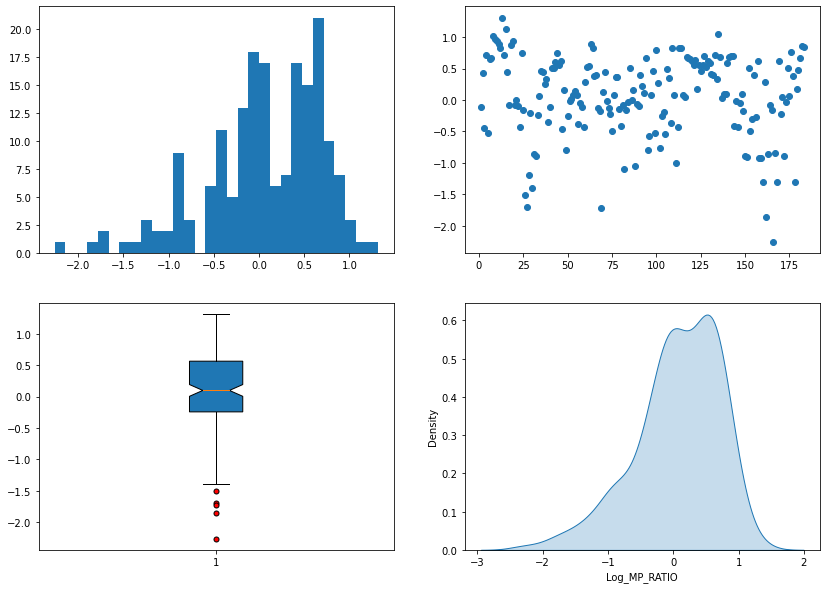

In [48]:
Data_Visualization(df3) # df3 scaled data

## 6. Principal Component Analysis (PCA)
    on the scaled dataframe (df3) 
    save to df_pca.csv

In [49]:
scaled_X_df2

array([[ 0.46563257,  0.80538727, -0.3137566 , ..., -0.49487166,
        -0.80538727, -0.93916594],
       [-0.73499915,  0.80538727,  0.50640768, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.30107008,  0.80538727,  0.04151822, ..., -0.49487166,
        -0.80538727, -0.93916594],
       ...,
       [ 0.49425013, -1.2416387 , -0.68110767, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.49425013, -1.2416387 , -0.73300343, ..., -0.49487166,
        -0.80538727, -0.93916594],
       [ 0.49425013, -1.2416387 , -1.36487619, ..., -0.49487166,
        -0.80538727, -0.93916594]])

In [50]:
# we want the explained variance to be between 95–99%. In Scikit-learn
#//95% of variance
from sklearn.decomposition import PCA

nComponents = 0.95
pca = PCA(n_components=nComponents).fit(scaled_X_df2)

In [51]:
x_pca = pca.transform(scaled_X_df2)
print(scaled_X_df2.shape)
print(x_pca.shape)

(183, 331)
(183, 52)


In [52]:
columns = ['pca_%i' % i for i in range(1, (x_pca.shape[1]+1))]
df_pca = pd.DataFrame(x_pca, columns=columns, index=df2.index)
df_pca.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52
index,,,,,,,,,,,,,,,,,,,,,
1,-1.932489,-9.369895,-0.429328,-2.896163,-0.860028,-4.625436,0.140549,-0.264314,-0.793396,0.656604,...,-0.102804,-1.216918,0.794060,0.005334,1.308561,0.613513,-0.625668,0.545121,-0.311322,-0.306187
2,11.875548,-11.720451,5.293248,4.672378,4.596623,-6.833438,9.608099,-4.221668,2.570879,1.955849,...,-0.240557,-0.288711,-0.662073,-0.768836,0.660976,0.659805,0.326068,0.271467,0.285403,0.673312
3,-0.107373,-2.805654,0.981750,6.574170,-3.389038,2.246912,4.505979,4.028233,1.238496,-2.717560,...,-0.500540,-0.784293,-0.715659,-0.539183,1.114615,-1.445342,0.888594,-0.749250,0.288211,0.046683
4,-2.143555,-8.906456,-7.642120,-3.128535,0.626197,-2.501226,-1.990190,-1.837358,1.553272,-0.065783,...,0.596870,0.950997,-0.721979,-0.307070,1.404008,1.062438,0.672862,-0.042480,-2.037658,1.644345
5,10.607591,-2.846858,7.165251,0.471743,-2.842250,-1.233028,-7.223117,-1.122639,3.682269,1.908214,...,-0.311134,2.257420,1.131548,-0.942353,0.109952,-0.967532,-1.268523,0.145893,1.347483,0.852110


In [53]:
df_pca = df_pca.join(df_output)
df_pca

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,...,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,-1.932489,-9.369895,-0.429328,-2.896163,-0.860028,-4.625436,0.140549,-0.264314,-0.793396,0.656604,...,-1.216918,0.794060,0.005334,1.308561,0.613513,-0.625668,0.545121,-0.311322,-0.306187,-0.119186
2,11.875548,-11.720451,5.293248,4.672378,4.596623,-6.833438,9.608099,-4.221668,2.570879,1.955849,...,-0.288711,-0.662073,-0.768836,0.660976,0.659805,0.326068,0.271467,0.285403,0.673312,0.423246
3,-0.107373,-2.805654,0.981750,6.574170,-3.389038,2.246912,4.505979,4.028233,1.238496,-2.717560,...,-0.784293,-0.715659,-0.539183,1.114615,-1.445342,0.888594,-0.749250,0.288211,0.046683,-0.443698
4,-2.143555,-8.906456,-7.642120,-3.128535,0.626197,-2.501226,-1.990190,-1.837358,1.553272,-0.065783,...,0.950997,-0.721979,-0.307070,1.404008,1.062438,0.672862,-0.042480,-2.037658,1.644345,0.711807
5,10.607591,-2.846858,7.165251,0.471743,-2.842250,-1.233028,-7.223117,-1.122639,3.682269,1.908214,...,2.257420,1.131548,-0.942353,0.109952,-0.967532,-1.268523,0.145893,1.347483,0.852110,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,9.836850,1.233745,-4.832227,0.805906,5.214431,-6.622625,-2.161562,0.159669,2.953209,2.110482,...,-0.881483,1.832298,-0.744569,-0.233842,-1.729909,0.534166,0.267195,0.083070,1.544554,0.176091
180,-7.864375,1.413901,0.783062,-1.131479,-0.095532,1.173689,-1.183842,0.366329,1.381644,-0.227329,...,0.216655,-0.422776,0.775516,-1.346407,-1.372402,0.085392,1.137203,-0.324752,0.152011,0.472628
181,-8.346712,1.281081,0.202058,0.763229,-1.335157,-0.734154,-1.519155,0.805224,0.308047,-0.195388,...,4.873409,2.850885,2.311225,1.716661,2.111291,0.098579,-1.077232,-0.159306,-1.730749,0.667194


In [54]:
# the principal components explain a part of the variance. 


len(pca.explained_variance_ratio_)

52

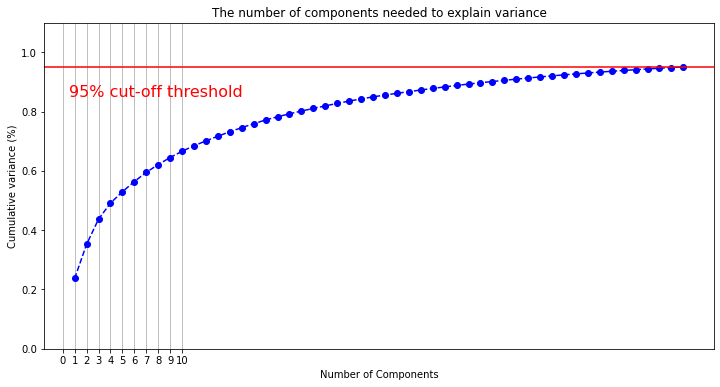

In [55]:
# From the Scikit-learn implementation, we can get the information about the explained variance 
# and plot the cumulative variance.

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, (len(pca.explained_variance_ratio_)+1), step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

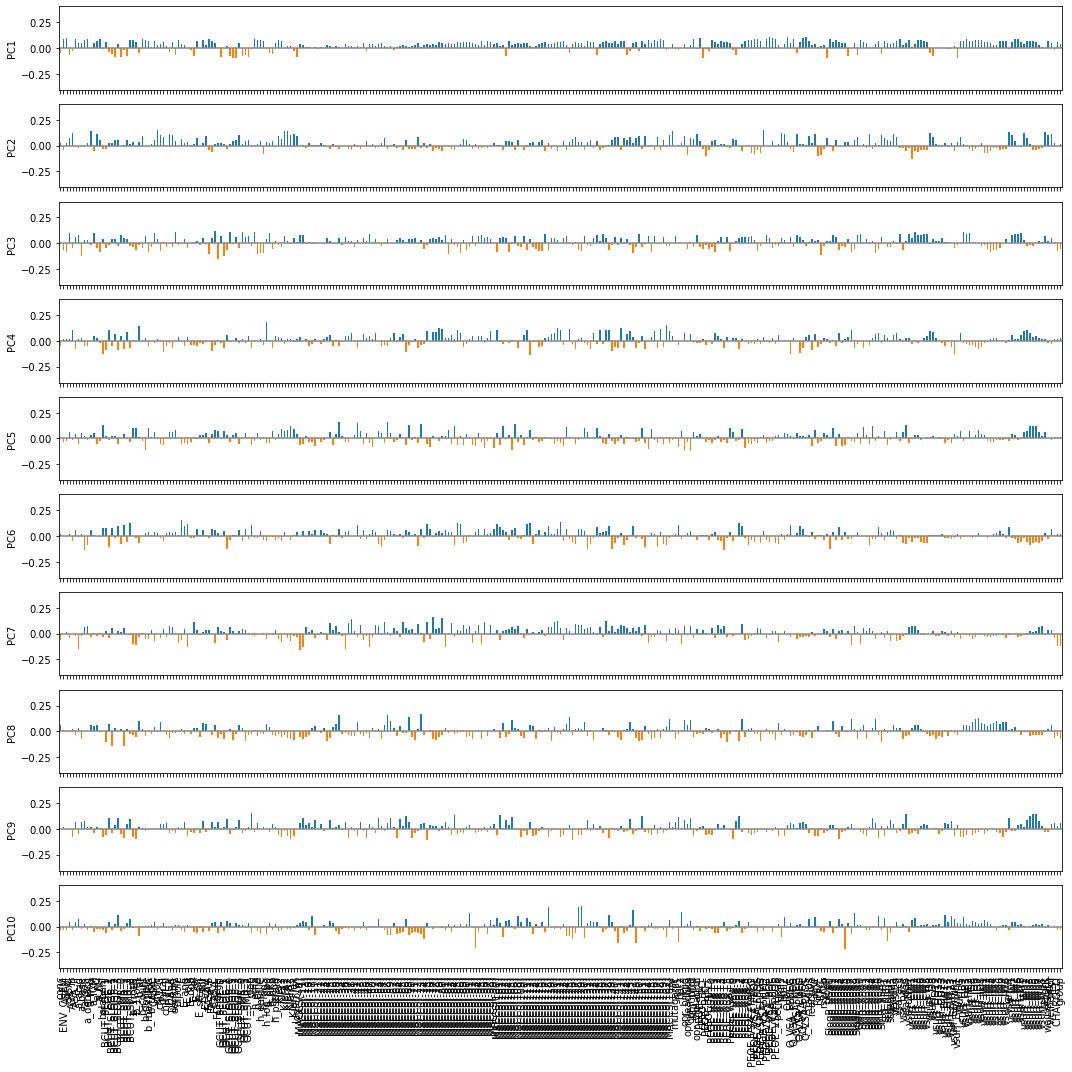

In [56]:
# Importance de chaque variable dans le PCA :

loadings = pd.DataFrame(pca.components_, 
                       columns=X_df2.dropna(axis=1).columns)

def feature_importance(loadings):
    maxPC = 1.01 * np.max(np.max(np.abs(loadings)))
    f, axes = plt.subplots(10, 1, figsize=(15, 15), sharex=True)
    for i, ax in enumerate(axes):
        pc_loadings = loadings.loc[i, :]
        colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
        ax.axhline(color='#888888')
        pc_loadings.plot.bar(ax=ax, color=colors)
        ax.set_ylabel(f'PC{i+1}')
        ax.set_ylim(-maxPC, maxPC)
    plt.tight_layout()
    plt.show()
    
feature_importance(loadings)

In [57]:
#save df_pca to csv
df_pcaToCsv = df_pca.join(df_set)
df_pcaToCsv.to_csv('df_pca.csv', encoding='utf-8')

In [58]:
nComponents = 0.95


# https://stats.stackexchange.com/questions/384541/use-pca-to-discover-the-most-impactful-variables-on-the-original-data-set
from sklearn.decomposition import PCA
import math

pca = PCA(n_components=nComponents, svd_solver='full')
pca.fit(scaled_X_df2)

pca_site = pca.transform(scaled_X_df2)

pca.explained_variance_ratio_

# https://michael-fuchs-python.netlify.app/2020/07/27/pca-for-visualization/
# Interpreting Components:
index = ['pca_%i' % i for i in range(1, (x_pca.shape[1]+1))]
components = pd.DataFrame(pca.components_, columns = list(X_df2.columns), index=index)

components

,conc,ENV_CHEM,ASA+,ASA-,ASA_H,ASA_P,a_acid,a_base,a_don,a_donacc,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,TEST,CHARGED,group
pca_1,-0.048029,0.089682,0.093776,-0.065190,-0.025815,0.084654,0.050600,0.044897,0.075346,0.091092,...,0.066525,0.061013,0.026913,0.011210,-0.002142,0.068515,0.046125,-0.020912,0.061637,0.034688
pca_2,0.022136,-0.045127,0.030474,0.078977,0.119944,-0.016350,-0.026353,0.010151,0.008083,0.029573,...,-0.041246,-0.044192,-0.032844,-0.022809,0.131595,0.105891,0.117871,0.024214,-0.001278,0.014324
pca_3,0.006942,-0.063283,-0.085214,0.102217,-0.045249,0.060971,0.080903,-0.126133,0.027486,0.028470,...,-0.025232,0.000713,0.026715,0.013984,0.073123,0.024937,0.050097,0.007778,-0.079499,-0.056882
pca_4,-0.050098,0.016515,0.015820,0.022865,0.101940,-0.074015,0.020060,0.032544,-0.051593,-0.045370,...,0.034823,0.043788,0.030966,0.019318,0.016773,-0.025230,-0.030540,0.019564,0.016757,0.025403
pca_5,-0.002971,-0.037926,-0.026950,0.061984,-0.010645,0.042909,-0.052614,0.056375,0.026388,-0.010489,...,0.124970,0.121908,0.063858,0.026850,0.058478,-0.000070,-0.012067,-0.003108,0.018518,0.012430
pca_6,0.019865,0.003649,-0.012121,0.020546,-0.045762,0.061848,-0.012116,0.021625,-0.131146,-0.088428,...,-0.065970,-0.055871,-0.069904,-0.044291,0.028545,-0.028870,0.070910,0.014089,0.016316,0.021597
pca_7,-0.060285,-0.005389,0.020855,-0.039875,-0.006421,-0.018518,-0.144748,-0.018367,0.062329,0.078714,...,0.015848,0.030505,0.064385,0.069913,-0.007970,0.035513,0.034371,-0.041094,-0.116241,-0.116362
pca_8,0.063299,0.016005,0.000285,-0.001011,0.024001,-0.032863,0.028599,-0.074641,-0.011395,0.007662,...,-0.040340,-0.032139,-0.036248,-0.035667,-0.004983,0.023674,0.063278,-0.062267,-0.049721,-0.078043
pca_9,-0.003271,0.020863,-0.012533,-0.008414,-0.076223,0.069212,-0.048338,0.067685,0.075055,0.019710,...,0.145837,0.140946,0.074472,0.024340,-0.030181,-0.025919,0.045396,0.052797,0.032204,0.058435
pca_10,-0.034302,-0.038270,-0.038008,0.043653,-0.035235,0.043013,0.075056,-0.026074,0.024220,-0.029852,...,0.015957,0.019901,0.014147,0.020776,-0.010294,0.015805,-0.004131,0.006991,-0.035792,-0.023402


In [59]:

#dataFrame = components.sum(axis = 1)
#print("\nSumming rows...\n",dataFrame)
################################
# Get a series containing maximum value of each column
# maxValuesObj = dfObj.max()
# print('Maximum value in each column : ')
# print(maxValuesObj)
#################################
# # Get a series containing maximum value of each row
# maxValuesPca = components.max(axis=1)
# print('Maximum value in each row : ')
# print(maxValuesPca)

# get the column name of max values in every row
maxValueIndexObj = components.idxmax(axis=1)
print("Max values of each pca :")
print(maxValueIndexObj)


Max values of each pca :
pca_1            Q_PC+
pca_2     PEOE_VSA_HYD
pca_3           FCASA-
pca_4        h_log_pbo
pca_5       MACCS(-58)
pca_6                E
pca_7       MACCS(-77)
pca_8       MACCS(-73)
pca_9             glob
pca_10      MACCS(129)
pca_11      MACCS(102)
pca_12      MACCS(-46)
pca_13      MACCS(-57)
pca_14      MACCS(-70)
pca_15      MACCS(-83)
pca_16      MACCS(114)
pca_17       mutagenic
pca_18      MACCS(-24)
pca_19       vsurf_IW3
pca_20        b_triple
pca_21      MACCS(-78)
pca_22      MACCS(-22)
pca_23      SlogP_VSA4
pca_24      MACCS(-28)
pca_25       vsurf_Wp8
pca_26       vsurf_Wp8
pca_27      PEOE_VSA+2
pca_28      vsurf_DW13
pca_29      MACCS(-13)
pca_30      vsurf_DD12
pca_31      MACCS(114)
pca_32       h_pstrain
pca_33      MACCS(-23)
pca_34      MACCS(-53)
pca_35      MACCS(-26)
pca_36      MACCS(-21)
pca_37      MACCS(-66)
pca_38      MACCS(-23)
pca_39        E_strain
pca_40      MACCS(-34)
pca_41           E_oop
pca_42      MACCS(-17)
pca_43   

In [60]:
#https://stackoverflow.com/questions/41117560/how-to-sort-rows-values-and-replace-them-by-column-names-on-a-pandas-dataframe

components.apply(lambda row: row.sort_values(ascending=False).index, axis=1)

pca_1     Index(['Q_PC+', 'Q_VSA_PPOS', 'PEOE_VSA_POL', ...
pca_2     Index(['PEOE_VSA_HYD', 'chi0v', 'a_hyd', 'mr',...
pca_3     Index(['FCASA-', 'vsurf_HB1', 'density', 'vsur...
pca_4     Index(['h_log_pbo', 'MACCS(162)', 'b_ar', 'MAC...
pca_5     Index(['MACCS(-58)', 'MACCS(-33)', 'MACCS(-42)...
pca_6     Index(['E', 'MACCS(122)', 'PEOE_VSA-2', 'MACCS...
pca_7     Index(['MACCS(-77)', 'MACCS(-80)', 'MACCS(-38)...
pca_8     Index(['MACCS(-73)', 'MACCS(-58)', 'MACCS(-33)...
pca_9     Index(['glob', 'vsurf_Wp5', 'vsurf_Wp6', 'vsa_...
pca_10    Index(['MACCS(129)', 'MACCS(128)', 'MACCS(118)...
pca_11    Index(['MACCS(102)', 'MACCS(130)', 'MACCS(124)...
pca_12    Index(['MACCS(-46)', 'PEOE_VSA-0', 'PEOE_RPC-'...
pca_13    Index(['MACCS(-57)', 'E_ang', 'MACCS(-22)', 'm...
pca_14    Index(['MACCS(-70)', 'MACCS(-63)', 'GCUT_PEOE_...
pca_15    Index(['MACCS(-83)', 'MACCS(-96)', 'PEOE_VSA+2...
pca_16    Index(['MACCS(114)', 'MACCS(-16)', 'vsurf_DD13...
pca_17    Index(['mutagenic', 'MACCS(-63

In [61]:
# most important feature for each pca

pd.DataFrame(components.columns[np.argsort(-components.values, axis=1)], 
                               index=components.index)

,0,1,2,3,4,5,6,7,8,9,...,321,322,323,324,325,326,327,328,329,330
pca_1,Q_PC+,Q_VSA_PPOS,PEOE_VSA_POL,PEOE_PC+,PEOE_VSA_POS,ASA+,Q_VSA_POL,PEOE_VSA_PNEG,PEOE_VSA_PPOS,a_donacc,...,GCUT_SMR_2,logP(o/w),BCUT_SMR_0,GCUT_PEOE_0,BCUT_SLOGP_2,GCUT_SLOGP_2,GCUT_SLOGP_1,SlogP,vsurf_EWmin1,PEOE_PC-
pca_2,PEOE_VSA_HYD,chi0v,a_hyd,mr,KierA2,KierA1,vsurf_R,Weight,vsurf_Wp1,pmi1,...,PEOE_VSA_FPNEG,vsurf_IW1,PEOE_VSA_FPPOS,PEOE_VSA_FPOL,h_logS,opr_leadlike,RPC-,PEOE_RPC+,RPC+,vsurf_CW1
pca_3,FCASA-,vsurf_HB1,density,vsurf_CW2,h_ema,GCUT_SMR_0,GCUT_SLOGP_0,h_pKa,a_ICM,CASA-,...,MACCS(-86),h_emd_C,SMR_VSA5,h_emd,MACCS(-82),FASA+,RPC-,GCUT_PEOE_1,a_base,FCharge
pca_4,h_log_pbo,MACCS(162),b_ar,MACCS(121),MACCS(142),MACCS(-79),MACCS(125),MACCS(-80),MACCS(158),BCUT_PEOE_2,...,BCUT_PEOE_1,FASA_P,MACCS(139),chiral,MACCS(-66),Q_VSA_PNEG,balabanJ,vsurf_EDmin1,Q_VSA_FPNEG,MACCS(112)
pca_5,MACCS(-58),MACCS(-33),MACCS(-42),MACCS(106),MACCS(-73),MACCS(-69),vsa_don,balabanJ,vsurf_Wp5,MACCS(102),...,npr1,MACCS(-50),PEOE_VSA-5,MACCS(-96),MACCS(-99),MACCS(154),b_double,MACCS(105),opr_brigid,opr_nring
pca_6,E,MACCS(122),PEOE_VSA-2,MACCS(112),MACCS(-85),BCUT_SMR_3,MACCS(-75),MACCS(-86),MACCS(100),E_ele,...,MACCS(152),MACCS(157),BCUT_PEOE_2,MACCS(-54),MACCS(139),SlogP_VSA0,MACCS(131),GCUT_PEOE_2,a_don,PEOE_VSA+4
pca_7,MACCS(-77),MACCS(-80),MACCS(-38),MACCS(137),MACCS(121),MACCS(120),MACCS(-65),MACCS(-57),E_sol,MACCS(-75),...,b_1rotR,CHARGED,group,MACCS(-11),MACCS(-81),MACCS(-47),E_ele,MACCS(-36),a_acid,MACCS(--8)
pca_8,MACCS(-73),MACCS(-58),MACCS(-33),MACCS(-69),MACCS(125),vsurf_ID7,SlogP_VSA7,vsurf_ID6,PEOE_VSA-4,SMR_VSA5,...,PEOE_VSA_FPPOS,MACCS(-24),MACCS(119),PEOE_VSA-2,GCUT_SMR_1,BCUT_PEOE_1,PEOE_VSA+5,SMR_VSA7,BCUT_SMR_1,BCUT_SLOGP_1
pca_9,glob,vsurf_Wp5,vsurf_Wp6,vsa_don,MACCS(101),MACCS(-84),PEOE_VSA-2,MACCS(151),MACCS(-66),vsurf_Wp3,...,MACCS(-70),MACCS(-37),BCUT_SMR_1,MACCS(-46),KierA3,PEOE_VSA-0,b_1rotR,SlogP_VSA3,MACCS(-75),MACCS(126)
pca_10,MACCS(129),MACCS(128),MACCS(118),MACCS(147),npr2,MACCS(-91),SlogP_VSA8,vsurf_DW12,BCUT_SLOGP_3,MACCS(138),...,pmi1,MACCS(130),MACCS(126),MACCS(-74),std_dim2,npr1,MACCS(141),MACCS(149),MACCS(-93),SlogP_VSA5


In [62]:


def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print(len(important_features),"Features by importance:\n", important_features)
    return important_features

#print(pca.explained_variance_ratio_)

important_features = get_important_features(pca_site, pca.components_, X_df2.columns)


331 Features by importance:
 [(4.807353604614102, 'chi0v'), (4.805464499067002, 'PEOE_VSA_HYD'), (4.710034740400617, 'mr'), (4.653109086372897, 'a_hyd'), (4.427109601888707, 'KierA2'), (4.377440474471958, 'KierA1'), (4.285063562857592, 'vsurf_R'), (4.18461304214408, 'Weight'), (4.1456466460162, 'vsurf_D3'), (4.113097458406033, 'vsurf_Wp1'), (4.049891256284833, 'vsurf_CW1'), (4.047480702115112, 'a_nC'), (3.9877197938418307, 'weinerPol'), (3.929671229652503, 'pmi1'), (3.928274444375502, 'weinerPath'), (3.915130895567107, 'VAdjMa'), (3.8910955645261756, 'Q_VSA_NEG'), (3.8891496587266006, 'ASA_H'), (3.8471112677762433, 'b_count'), (3.8101114242198464, 'logP(o/w)'), (3.74873793073425, 'rgyr'), (3.7174252264942926, 'vsurf_W1'), (3.7118484961513887, 'Kier2'), (3.699894311998191, 'GCUT_SLOGP_3'), (3.685619231533307, 'SMR_VSA7'), (3.6768704233519007, 'opr_violation'), (3.6711151037955823, 'DASA'), (3.6593895428073515, 'SlogP'), (3.649305576566002, 'pmi2'), (3.6451650315540842, 'radius'), (3.640

In [63]:
# from sklearn.decomposition import PCA
# import pandas as pd
# import numpy as np
# np.random.seed(0)

# # 10 samples with 5 features
# train_features = np.random.rand(10,5)

# model = PCA(n_components=2).fit(train_features)
# X_pc = model.transform(train_features)
# x_pca
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_df2.columns.values
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())


df

['Q_PC+', 'PEOE_VSA_HYD', 'FCharge', 'h_log_pbo', 'MACCS(-58)', 'E', 'MACCS(-77)', 'MACCS(-73)', 'glob', 'SlogP_VSA5', 'MACCS(102)', 'MACCS(-46)', 'MACCS(-57)', 'MACCS(-70)', 'MACCS(-83)', 'MACCS(114)', 'mutagenic', 'MACCS(-24)', 'MACCS(113)', 'b_triple', 'MACCS(-78)', 'MACCS(-22)', 'conc', 'MACCS(-28)', 'MACCS(113)', 'vsurf_Wp8', 'MACCS(-37)', 'vsurf_DW13', 'MACCS(-13)', 'MACCS(-19)', 'vsurf_DD23', 'h_pstrain', 'MACCS(-23)', 'MACCS(-53)', 'MACCS(-26)', 'MACCS(-21)', 'vsurf_DD13', 'MACCS(-23)', 'E_oop', 'MACCS(-34)', 'MACCS(-34)', 'MACCS(-17)', 'MACCS(-34)', 'MACCS(-21)', 'MACCS(-43)', 'rsynth', 'MACCS(116)', 'vsurf_DW12', 'MACCS(-17)', 'TEST', 'rsynth', 'MACCS(115)']


,0,1
0,PC0,Q_PC+
1,PC1,PEOE_VSA_HYD
2,PC2,FCharge
3,PC3,h_log_pbo
4,PC4,MACCS(-58)
5,PC5,E
6,PC6,MACCS(-77)
7,PC7,MACCS(-73)
8,PC8,glob
9,PC9,SlogP_VSA5


## 7. SelectKBest
    on the scaled dataframe (df3) - save to csv : df_SelectKBest.csv

In [64]:
df3

,conc,ENV_CHEM,ASA+,ASA-,ASA_H,ASA_P,a_acid,a_base,a_don,a_donacc,...,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,TEST,CHARGED,group,Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,0.465633,0.805387,-0.313757,-1.007823,-1.224640,-0.084355,-0.392017,-0.628828,1.346150,0.605165,...,0.780186,-0.226971,-0.074125,-1.510011,-0.615007,-1.495996,-0.494872,-0.805387,-0.939166,-0.119186
2,-0.734999,0.805387,0.506408,-1.259266,-1.633506,1.217306,-0.392017,-0.628828,2.331532,1.972389,...,4.658291,11.873983,13.490738,-0.928176,-0.415341,-0.771918,-0.494872,-0.805387,-0.939166,0.423246
3,0.301070,0.805387,0.041518,-0.059331,0.255527,-0.341123,-0.392017,-0.628828,-0.624614,0.263359,...,-0.651730,-0.226971,-0.074125,-0.271524,-0.086275,0.412937,-0.494872,-0.805387,-0.939166,-0.443698
4,0.464808,0.805387,-0.002819,-1.312852,-1.036761,-0.239164,-0.392017,1.114741,-0.624614,-0.762059,...,-0.055099,-0.226971,-0.074125,-1.627466,-0.642835,-1.627647,-0.494872,1.241639,0.652199,0.711807
5,-1.332866,0.805387,0.165890,-0.062957,-0.697547,1.255967,2.081746,-0.628828,1.346150,0.946971,...,1.197828,-0.226971,-0.074125,0.039899,0.219138,0.347111,2.020726,1.241639,2.243563,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-3.469375,0.805387,1.155088,-0.447901,0.082529,0.912008,-0.392017,1.114741,2.331532,1.288777,...,1.436480,0.754187,-0.074125,-0.109270,0.387498,-0.047840,-0.494872,1.241639,0.652199,0.176091
180,0.494250,-1.241639,-0.678569,0.621579,-0.382537,0.234038,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.651730,-0.226971,-0.074125,0.087739,-0.275505,-0.311141,-0.494872,-0.805387,-0.939166,0.472628
181,0.494250,-1.241639,-0.681108,0.691204,0.672012,-0.965153,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.651730,-0.226971,-0.074125,-0.198774,-0.310986,-0.508617,-0.494872,-0.805387,-0.939166,0.667194


In [65]:
# function to select the best k number of features with p_value <= 0.05 and f_score >= 5

def select_KBest(x, y, k, p_value_threshold = 0.05, score_threshold = 5):
    feature_selector = SelectKBest(f_regression, k = k)
    fit = feature_selector.fit(x,y)   

    p_values = pd.DataFrame(fit.pvalues_)
    scores = pd.DataFrame(fit.scores_)
    input_variable_names = pd.DataFrame(x.columns)
    support = pd.DataFrame(fit.get_support())
    summary_stats = pd.concat([input_variable_names, p_values, scores, support], axis = 1)
    summary_stats.columns = ["input_variable", "p_value", "f_score", 'support']
    summary_stats.sort_values(by = "p_value", inplace = True)

    
    selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                           (summary_stats["p_value"] <= p_value_threshold)]
    stat_significance = selected_variables
    selected_variables = selected_variables["input_variable"].tolist()
    
    new_features  = fit.get_feature_names_out(x.columns.values)   # # Extract the best features name
    x_new = x[new_features]                      # <- new x dataframe with k number of columns 
    x_selected_variables = x[selected_variables] # <- new x dataframe with selected features with to p_value <= 0.05 and f_score >= 5
       
    return stat_significance, x_new, x_selected_variables, new_features 

In [66]:
x = df3.drop(columns=['Log_MP_RATIO'])
y = df3['Log_MP_RATIO']


In [67]:
x.shape

(183, 331)

In [68]:
stat_significance, x_new_kAll, x_selected_variables, new_features_kAll= select_KBest(x, y, 'all')
stat_significance, x_new_k1, x_selected_variables, new_features_k1 = select_KBest(x, y, 1)
stat_significance, x_new_k10, x_selected_variables, new_features_k10 = select_KBest(x, y, 10)
stat_significance, x_new_k50, x_selected_variables, new_features_k50 = select_KBest(x, y, 50)


In [69]:
stat_significance

,input_variable,p_value,f_score,support
58,GCUT_SLOGP_2,2.441057e-19,102.254317,True
194,MACCS(154),4.520721e-19,100.350296,True
264,SMR_VSA0,5.269667e-19,99.878696,True
296,vsurf_EWmin1,1.354026e-18,96.993315,True
277,vsa_acc,3.590804e-18,94.043337,True
...,...,...,...,...
15,BCUT_PEOE_1,1.706165e-02,5.796604,False
259,SlogP_VSA5,1.784371e-02,5.715289,False
162,MACCS(119),1.821338e-02,5.678136,False
121,MACCS(-75),1.989229e-02,5.518743,False


In [70]:
x_new_k10

,ENV_CHEM,DASA,GCUT_SLOGP_2,MACCS(154),PEOE_VSA_FPNEG,PEOE_VSA_PNEG,SlogP,SMR_VSA0,vsa_acc,vsurf_EWmin1
index,,,,,,,,,,
1,0.805387,-1.294161,-0.687403,0.349138,0.854906,0.084470,-0.681544,-0.105379,-0.094626,0.075385
2,0.805387,-0.109509,-1.027004,0.349138,1.287014,0.714590,-1.495059,0.154266,0.567452,-1.381186
3,0.805387,-1.577503,-0.547918,-0.649179,-0.618081,-0.586052,0.116252,-0.668632,0.428477,-0.340348
4,0.805387,-0.642459,-0.606131,-0.649179,-0.798898,-0.780435,-0.838528,-0.668632,-0.742288,0.787508
5,0.805387,-1.656184,-0.749591,2.345773,1.631557,1.765548,-1.407670,2.028640,1.848359,-1.259704
...,...,...,...,...,...,...,...,...,...,...
179,0.805387,-0.148477,-0.592030,0.349138,0.468895,0.690991,-0.728189,-0.105379,-0.094626,-1.117011
180,-1.241639,-0.092884,0.908113,-0.649179,-0.887643,-0.827381,0.962972,-0.668632,-0.742288,1.310097
181,-1.241639,-0.022709,0.588175,-0.649179,-0.887643,-0.827381,0.806249,-0.668632,-0.742288,1.404430


In [71]:
df_selected_variables = x_selected_variables.join(df_output)
df_selected_variables

,GCUT_SLOGP_2,MACCS(154),SMR_VSA0,vsurf_EWmin1,vsa_acc,ENV_CHEM,PEOE_VSA_FPNEG,PEOE_VSA_PNEG,SlogP,DASA,...,E,MACCS(116),MACCS(-24),MACCS(-77),BCUT_PEOE_1,SlogP_VSA5,MACCS(119),MACCS(-75),MACCS(114),Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,-0.687403,0.349138,-0.105379,0.075385,-0.094626,0.805387,0.854906,0.084470,-0.681544,-1.294161,...,-1.395229,-0.513691,-0.129099,-0.345986,-0.305803,-0.655781,-0.295493,-0.423337,-0.358379,-0.119186
2,-1.027004,0.349138,0.154266,-1.381186,0.567452,0.805387,1.287014,0.714590,-1.495059,-0.109509,...,-2.024936,-0.513691,-0.129099,3.661318,0.391835,-0.134066,1.784321,1.038373,-0.358379,0.423246
3,-0.547918,-0.649179,-0.668632,-0.340348,0.428477,0.805387,-0.618081,-0.586052,0.116252,-1.577503,...,0.391573,-0.513691,-0.129099,2.058396,-0.322409,-0.134066,1.784321,-0.423337,-0.358379,-0.443698
4,-0.606131,-0.649179,-0.668632,0.787508,-0.742288,0.805387,-0.798898,-0.780435,-0.838528,-0.642459,...,-0.879702,-0.513691,-0.129099,-0.345986,0.414713,-0.069328,-0.295493,-0.423337,-0.358379,0.711807
5,-0.749591,2.345773,2.028640,-1.259704,1.848359,0.805387,1.631557,1.765548,-1.407670,-1.656184,...,1.105015,-0.513691,-0.129099,-0.345986,0.040814,-0.655781,-0.295493,-0.423337,-0.358379,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.592030,0.349138,-0.105379,-1.117011,-0.094626,0.805387,0.468895,0.690991,-0.728189,-0.148477,...,-0.394697,1.575318,-0.129099,-0.345986,0.071068,-0.069328,-0.295493,-0.423337,-0.358379,0.176091
180,0.908113,-0.649179,-0.668632,1.310097,-0.742288,-1.241639,-0.887643,-0.827381,0.962972,-0.092884,...,-0.133049,-0.513691,-0.129099,-0.345986,-0.560425,-0.655781,-0.295493,-0.423337,-0.358379,0.472628
181,0.588175,-0.649179,-0.668632,1.404430,-0.742288,-1.241639,-0.887643,-0.827381,0.806249,-0.022709,...,-0.469584,-0.513691,-0.129099,-0.345986,-0.553488,-0.537186,-0.295493,-0.423337,-0.358379,0.667194


In [72]:
missing_features = []
for feature in X_important_descriptors.columns.values:
    if feature not in x_selected_variables.columns.values:
        missing_features.append(feature)
print(len(missing_features),'Important_descriptors for Predicting Milk:Serum Partitioning (table 5) not selected by selectKBest \n  according to p_value f_score : \n', missing_features)        
        

8 Important_descriptors for Predicting Milk:Serum Partitioning (table 5) not selected by selectKBest 
  according to p_value f_score : 
 ['a_acc', 'h_logP', 'FCASA+', 'h_mr', 'vsurf_DD13', 'SMR_VSA2', 'vsurf_D4', 'b_rotR']


In [73]:
kBest_list = stat_significance['input_variable'].values
kBest_list

array(['GCUT_SLOGP_2', 'MACCS(154)', 'SMR_VSA0', 'vsurf_EWmin1',
       'vsa_acc', 'ENV_CHEM', 'PEOE_VSA_FPNEG', 'PEOE_VSA_PNEG', 'SlogP',
       'DASA', 'b_double', 'GCUT_SLOGP_1', 'vsurf_CW6', 'PEOE_VSA_POL',
       'MACCS(134)', 'GCUT_SMR_2', 'PEOE_VSA_FPOL', 'vsurf_W6', 'h_ema',
       'E_sol', 'a_acid', 'BCUT_SLOGP_2', 'logP(o/w)', 'PEOE_VSA-5',
       'PEOE_PC-', 'density', 'MACCS(123)', 'vsurf_HB3', 'MACCS(156)',
       'h_pKb', 'SlogP_VSA9', 'PEOE_VSA-6', 'vsurf_IW7', 'vsurf_D8',
       'vsurf_CW7', 'vsurf_IW6', 'vsurf_ID3', 'vsurf_IW2', 'FASA+',
       'SlogP_VSA2', 'vsurf_CW3', 'SlogP_VSA0', 'MACCS(-95)',
       'PEOE_VSA_FPOS', 'vsa_other', 'ASA+', 'vsurf_IW8', 'GCUT_PEOE_0',
       'GCUT_SMR_1', 'Q_VSA_PPOS', 'MACCS(103)', 'PEOE_VSA+0',
       'MACCS(136)', 'ASA-', 'SMR_VSA7', 'PEOE_VSA_POS', 'vsurf_CW8',
       'Q_PC+', 'vsurf_ID6', 'vsurf_W8', 'MACCS(144)', 'MACCS(159)',
       'vsurf_W2', 'BCUT_SMR_2', 'Q_VSA_FPPOS', 'vsurf_IW1', 'PEOE_VSA+5',
       'a_donacc', 'MACCS(1

In [74]:
communDescriptoPcaSelectKbest = []
print(len(most_important_names))
print(len(kBest_list))
for name in kBest_list:
    if name in most_important_names:
        communDescriptoPcaSelectKbest.append(name)
      

print('Number of descriptors selected in pca and selectKBest : ', len(communDescriptoPcaSelectKbest), '\n', communDescriptoPcaSelectKbest)
    

52
202
Number of descriptors selected in pca and selectKBest :  13 
 ['Q_PC+', 'MACCS(-83)', 'MACCS(-46)', 'FCharge', 'MACCS(-78)', 'conc', 'MACCS(-19)', 'E', 'MACCS(116)', 'MACCS(-24)', 'MACCS(-77)', 'SlogP_VSA5', 'MACCS(114)']


In [75]:
#save selected_variables to csv
df_selected_variablesToCsv=df_selected_variables.join(df_set)

df_selected_variablesToCsv.to_csv('df_KB_selected_variables.csv', encoding='utf-8')



In [76]:
df_new_k1 = x_new_k1.join(df_output)
df_new_k10 = x_new_k10.join(df_output)
df_new_k50 = x_new_k50.join(df_output)

In [77]:
df_new_k1ToCsv=df_new_k1.join(df_set)
df_new_k10ToCsv=df_new_k10.join(df_set)
df_new_k50ToCsv=df_new_k50.join(df_set)

In [78]:
df_new_k1ToCsv.to_csv('df_KB_k1.csv', encoding='utf-8')
df_new_k10ToCsv.to_csv('df_KB_k10.csv', encoding='utf-8')
df_new_k50ToCsv.to_csv('df_KB_k50.csv', encoding='utf-8')

## 8. Corrolation with output

In [79]:
#Corr_list_relevant_features fuction returns a correlation matrix list between features and output > 0.5
def Corr_list_relevant_features(df, target=0.5):
    cor = df.corr()
    cor_target = abs(cor['Log_MP_RATIO'])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>target]
    return relevant_features

correlated_features = Corr_list_relevant_features(df3)

print(len(correlated_features) ,'Number of descriptors correlated with y > 0.5','\n', correlated_features)


22 Number of descriptors correlated with y > 0.5 
 ENV_CHEM          0.582632
a_acid            0.500293
b_double          0.543089
DASA              0.547024
E_sol             0.502328
GCUT_SLOGP_1      0.538647
GCUT_SLOGP_2      0.600831
GCUT_SMR_2        0.520091
h_ema             0.505217
MACCS(134)        0.525753
MACCS(154)        0.597222
PEOE_VSA_FPNEG    0.577693
PEOE_VSA_FPOL     0.516797
PEOE_VSA_PNEG     0.572234
PEOE_VSA_POL      0.535125
SlogP             0.560981
SMR_VSA0          0.596317
vsa_acc           0.584741
vsurf_CW6         0.538361
vsurf_EWmin1      0.590682
vsurf_W6          0.513319
Log_MP_RATIO      1.000000
Name: Log_MP_RATIO, dtype: float64


In [80]:
#List of descriptors correlated with y > 0.5
corr_list = correlated_features.index.tolist
corr_list

<bound method IndexOpsMixin.tolist of Index(['ENV_CHEM', 'a_acid', 'b_double', 'DASA', 'E_sol', 'GCUT_SLOGP_1',
       'GCUT_SLOGP_2', 'GCUT_SMR_2', 'h_ema', 'MACCS(134)', 'MACCS(154)',
       'PEOE_VSA_FPNEG', 'PEOE_VSA_FPOL', 'PEOE_VSA_PNEG', 'PEOE_VSA_POL',
       'SlogP', 'SMR_VSA0', 'vsa_acc', 'vsurf_CW6', 'vsurf_EWmin1', 'vsurf_W6',
       'Log_MP_RATIO'],
      dtype='object')>

In [81]:
cor = df3.corr()
cor_features_output = abs(cor['Log_MP_RATIO'])

print(cor_features_output.sort_values(kind="quicksort").to_string())



DCASA             0.000522
MACCS(-23)        0.001704
vsurf_DW12        0.003492
MACCS(-58)        0.005912
SMR_VSA4          0.008597
MACCS(-22)        0.011252
b_triple          0.012733
MACCS(-70)        0.012844
MACCS(-63)        0.013217
MACCS(152)        0.013373
MACCS(-13)        0.014059
vsurf_DW23        0.016748
MACCS(-69)        0.017003
MACCS(-16)        0.017573
vsurf_DW13        0.017587
pmi2              0.027423
MACCS(130)        0.028162
E_vdw             0.028307
vsurf_EDmin1      0.028870
MACCS(-33)        0.029062
chi0v             0.029070
MACCS(-28)        0.031065
MACCS(-43)        0.031296
vsa_base          0.031545
MACCS(-73)        0.032222
PEOE_VSA-2        0.034502
PEOE_VSA+6        0.034683
rgyr              0.034770
npr2              0.035951
glob              0.036131
E_strain          0.036501
vsurf_DD23        0.037458
vsurf_Wp1         0.038123
MACCS(-41)        0.040128
MACCS(-25)        0.040361
vsurf_Wp7         0.040956
vsurf_Wp8         0.041239
M

<AxesSubplot:>

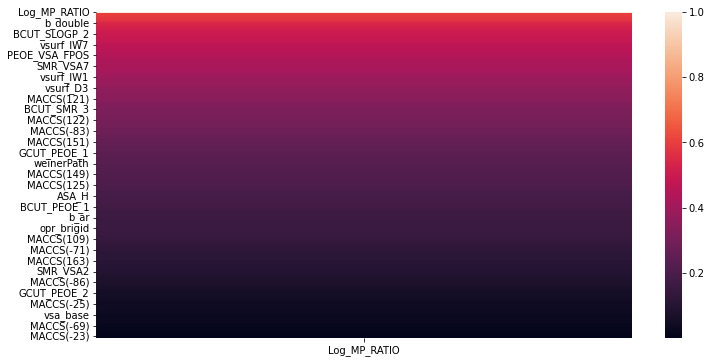

In [82]:
# plot corrolation with y

sns.heatmap(cor_features_output.sort_values(ascending=False, kind="quicksort").to_frame())

In [83]:
#only 5 features from important_descriptors are highly correlated with output
Corr_list_relevant_features(df_important_descriptors)

DASA            0.547024
h_ema           0.505217
GCUT_SLOGP_2    0.600831
GCUT_SMR_2      0.520091
Log_MP_RATIO    1.000000
Name: Log_MP_RATIO, dtype: float64

In [84]:
# Function to split the dataframe according to the column  'set' stored in df_set above
# as defined in the 'milk_plasma_all_data_mrg_020821.xlsx' first sheet 'full_dataset'
# and split input (X)/output(y) 

def split(df, df_set=df_set):
    df = df.join(df_set)
    split = df.groupby('set')
    test = split.get_group('TEST')
    training = split.get_group('TRAINING')

    df_Test = test.apply(lambda x: x)
    df_Training = training.apply(lambda x: x)
    X_test = df_Test.drop(columns=['Log_MP_RATIO','set'])
    X_train = df_Training .drop(columns=['Log_MP_RATIO','set'])
    y_test = df_Test['Log_MP_RATIO']
    y_train = df_Training['Log_MP_RATIO']
    return X_test, X_train, y_test, y_train

In [85]:
X_test, X_train, y_test, y_train = split(df3, df_set)

In [86]:
X_test.shape, X_train.shape, y_test.shape, y_train.shape 

((37, 331), (146, 331), (37,), (146,))

In [87]:
type(X_train.shape[1])


int

## 9. Find outliers 

In [88]:
#function to find outliers using IQR

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [89]:
#find outliers in df
def df_listOutliers(df):
    listOutliers=[]
    for c in df.columns:
        if len(find_outliers_IQR(df[c]))>0:
            listOutliers.append((c,len(find_outliers_IQR(df[c]))))
    
    return len(listOutliers), listOutliers    

In [90]:
#find outliers in df3
df_listOutliers(df3)

(286,
 [('conc', 35),
  ('ASA+', 1),
  ('ASA_H', 2),
  ('ASA_P', 6),
  ('a_acid', 26),
  ('a_base', 2),
  ('a_don', 11),
  ('a_donacc', 3),
  ('a_hyd', 6),
  ('a_ICM', 7),
  ('a_nC', 8),
  ('a_nH', 3),
  ('balabanJ', 7),
  ('BCUT_PEOE_1', 10),
  ('BCUT_PEOE_2', 19),
  ('BCUT_SLOGP_1', 4),
  ('BCUT_SLOGP_3', 7),
  ('BCUT_SMR_1', 10),
  ('BCUT_SMR_2', 3),
  ('BCUT_SMR_3', 1),
  ('b_1rotN', 1),
  ('b_1rotR', 4),
  ('b_count', 3),
  ('b_double', 23),
  ('b_max1len', 3),
  ('b_triple', 4),
  ('CASA-', 18),
  ('chi0v', 9),
  ('chi1_C', 3),
  ('chiral', 18),
  ('chiral_u', 37),
  ('DCASA', 8),
  ('density', 3),
  ('dipole', 5),
  ('E', 13),
  ('E_ang', 9),
  ('E_ele', 37),
  ('E_oop', 48),
  ('E_sol', 6),
  ('E_str', 13),
  ('E_strain', 27),
  ('E_tor', 8),
  ('E_vdw', 9),
  ('FASA_P', 2),
  ('FCASA-', 17),
  ('FCharge', 3),
  ('GCUT_PEOE_1', 10),
  ('GCUT_PEOE_2', 4),
  ('GCUT_SLOGP_1', 3),
  ('GCUT_SLOGP_3', 8),
  ('GCUT_SMR_1', 6),
  ('glob', 7),
  ('h_ema', 13),
  ('h_emd_C', 2),
  ('h_ps

## Recursive Feature Elimination 

In [91]:
# RFE with LinearRegression


In [92]:
X = df3.drop(columns=['Log_MP_RATIO'])
y = df3['Log_MP_RATIO']

In [93]:
#finding the optimum number of features with highest accuracy.

#no of features
nof_list=np.arange(1,X_train.shape[1]+1)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))



Optimum number of features: 8
Score with 8 features: 0.040296


In [94]:
X_train

,conc,ENV_CHEM,ASA+,ASA-,ASA_H,ASA_P,a_acid,a_base,a_don,a_donacc,...,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,TEST,CHARGED,group
index,,,,,,,,,,,,,,,,,,,,,
1,0.465633,0.805387,-0.313757,-1.007823,-1.224640,-0.084355,-0.392017,-0.628828,1.346150,0.605165,...,0.609743,0.780186,-0.226971,-0.074125,-1.510011,-0.615007,-1.495996,-0.494872,-0.805387,-0.939166
2,-0.734999,0.805387,0.506408,-1.259266,-1.633506,1.217306,-0.392017,-0.628828,2.331532,1.972389,...,2.897804,4.658291,11.873983,13.490738,-0.928176,-0.415341,-0.771918,-0.494872,-0.805387,-0.939166
3,0.301070,0.805387,0.041518,-0.059331,0.255527,-0.341123,-0.392017,-0.628828,-0.624614,0.263359,...,-0.755999,-0.651730,-0.226971,-0.074125,-0.271524,-0.086275,0.412937,-0.494872,-0.805387,-0.939166
4,0.464808,0.805387,-0.002819,-1.312852,-1.036761,-0.239164,-0.392017,1.114741,-0.624614,-0.762059,...,1.035428,-0.055099,-0.226971,-0.074125,-1.627466,-0.642835,-1.627647,-0.494872,1.241639,0.652199
5,-1.332866,0.805387,0.165890,-0.062957,-0.697547,1.255967,2.081746,-0.628828,1.346150,0.946971,...,1.336956,1.197828,-0.226971,-0.074125,0.039899,0.219138,0.347111,2.020726,1.241639,2.243563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-3.469375,0.805387,1.155088,-0.447901,0.082529,0.912008,-0.392017,1.114741,2.331532,1.288777,...,2.277012,1.436480,0.754187,-0.074125,-0.109270,0.387498,-0.047840,-0.494872,1.241639,0.652199
180,0.494250,-1.241639,-0.678569,0.621579,-0.382537,0.234038,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.755999,-0.651730,-0.226971,-0.074125,0.087739,-0.275505,-0.311141,-0.494872,-0.805387,-0.939166
181,0.494250,-1.241639,-0.681108,0.691204,0.672012,-0.965153,-0.392017,-0.628828,-0.624614,-0.762059,...,-0.755999,-0.651730,-0.226971,-0.074125,-0.198774,-0.310986,-0.508617,-0.494872,-0.805387,-0.939166


In [95]:
rfe = RFE(model, n_features_to_select=nof)
rfe.fit(X_train, y_train)
features = X_train.columns
temp = pd.Series(rfe.support_,index= features)
selected_features_RFE = temp[temp==True].index
print(selected_features_RFE)

Index(['BCUT_PEOE_1', 'BCUT_SLOGP_2', 'DASA', 'MACCS(-84)', 'MACCS(150)',
       'vsurf_ID7', 'vsurf_ID8', 'vsurf_Wp2'],
      dtype='object')


In [96]:
# print out the features in order of ranking
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 BCUT_PEOE_1
1 BCUT_SLOGP_2
1 DASA
1 MACCS(-84)
1 MACCS(150)
1 vsurf_ID7
1 vsurf_ID8
1 vsurf_Wp2
2 density
3 PEOE_VSA+1
4 TEST
5 MACCS(152)
6 PEOE_VSA_PNEG
7 MACCS(-92)
8 b_1rotR
9 vsurf_EDmin1
10 vsurf_W1
11 MACCS(-63)
12 radius
13 KierA1
14 Kier3
15 MACCS(103)
16 PEOE_VSA-0
17 MACCS(-43)
18 MACCS(-82)
19 MACCS(129)
20 opr_leadlike
21 MACCS(109)
22 MACCS(132)
23 MACCS(-81)
24 std_dim3
25 vsurf_EWmin1
26 MACCS(156)
27 MACCS(-96)
28 std_dim1
29 glob
30 npr2
31 h_pKa
32 PEOE_VSA-4
33 MACCS(131)
34 vsurf_Wp6
35 vsurf_Wp7
36 MACCS(119)
37 MACCS(-36)
38 BCUT_SLOGP_3
39 vsurf_IW4
40 mutagenic
41 vsurf_IW5
42 h_pstrain
43 VDistEq
44 vsurf_IW8
45 MACCS(--8)
46 MACCS(-47)
47 MACCS(116)
48 PEOE_RPC+
49 GCUT_PEOE_2
50 MACCS(111)
51 opr_nrot
52 MACCS(-50)
53 GCUT_SLOGP_0
54 h_emd
55 PEOE_VSA_FPPOS
56 Q_VSA_PPOS
57 MACCS(135)
58 balabanJ
59 GCUT_SMR_2
60 PEOE_VSA-2
61 MACCS(-52)
62 a_don
63 PEOE_VSA+2
64 BCUT_PEOE_2
65 MACCS(-37)
66 rgyr
67 E_strain
68 MACCS(-38)
69 KierFlex
70 vsurf_D8
71 npr1
72

In [104]:
# print out the features in order of ranking
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)



1 DASA
1 E_sol
1 FASA+
1 FCharge
1 GCUT_SLOGP_2
1 GCUT_SLOGP_3
1 h_emd
1 h_logS
1 SlogP_VSA9
1 vsa_other
2 h_log_pbo
3 std_dim2
4 SMR_VSA0
5 PEOE_VSA_PNEG
6 GCUT_SMR_0
7 h_emd_C
8 RPC-
9 PEOE_PC+
10 GCUT_PEOE_1
11 GCUT_SLOGP_1
12 RPC+
13 E_oop
14 GCUT_SMR_1
15 PEOE_VSA_POS
16 E
17 vsurf_IW2
18 BCUT_SMR_3
19 ASA+
20 npr2
21 vsurf_Wp3
22 b_1rotR
23 SlogP
24 weinerPol
25 vsurf_IW4
26 PEOE_VSA-0
27 GCUT_PEOE_0
28 Q_VSA_NEG
29 Q_VSA_FPPOS
30 vsurf_EDmin1
31 vsurf_CW8
32 SlogP_VSA5
33 PEOE_VSA_FPNEG
34 DCASA
35 balabanJ
36 chi1_C
37 SMR_VSA3
38 h_pstrain
39 SlogP_VSA7
40 Q_VSA_PPOS
41 std_dim3
42 PEOE_VSA_FPPOS
43 PEOE_VSA+0
44 density
45 SlogP_VSA1
46 PEOE_RPC+
47 ASA-
48 vsurf_ID8
49 vsurf_DD13
50 vsurf_Wp2
51 GCUT_PEOE_2
52 BCUT_SLOGP_3
53 E_ang
54 vsurf_DD23
55 pmi1
56 MACCS(108)
57 vsurf_ID3
58 FCASA-
59 Q_VSA_FPNEG
60 vsurf_ID7
61 PEOE_RPC-
62 SMR_VSA1
63 logP(o/w)
64 vsurf_IW1
65 BCUT_SLOGP_1
66 SMR_VSA5
67 vsurf_CW1
68 vsurf_W1
69 GCUT_SMR_2
70 vsurf_DW13
71 vsurf_DD12
72 vsurf_IW6
7

In [100]:
# https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example/notebook

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)


# scikit-learn Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE

# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# the features in order of ranking

from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

# the top 10 featues and use them for the model

n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# use the model to predict the prices for the test data

predictions = rfe.predict(X_test)

# write out CSV submission file

# output = pd.DataFrame({"Id":test_data.index, target:predictions})
# output.to_csv('submission.csv', index=False)

1 GCUT_SLOGP_2
2 FASA+
3 E_sol
4 h_emd
5 h_logS
6 vsa_other
7 DASA
8 FCharge
9 SlogP_VSA9
10 GCUT_SLOGP_3
11 h_log_pbo
12 GCUT_SMR_0
13 std_dim2
14 SMR_VSA0
15 PEOE_VSA_PNEG
16 RPC+
17 h_emd_C
18 GCUT_PEOE_1
19 RPC-
20 ASA-
21 BCUT_SMR_3
22 chi1_C
23 vsurf_IW2
24 GCUT_SLOGP_1
25 GCUT_PEOE_0
26 E_oop
27 vsurf_Wp2
28 SlogP_VSA5
29 npr2
30 vsurf_IW4
31 ASA+
32 PEOE_VSA-0
33 E
34 Q_VSA_FPPOS
35 DCASA
36 GCUT_SMR_1
37 vsurf_EDmin1
38 npr1
39 SMR_VSA3
40 PEOE_PC+
41 PEOE_VSA_FPOS
42 SlogP_VSA1
43 weinerPol
44 GCUT_PEOE_2
45 PEOE_RPC+
46 vsurf_ID3
47 PEOE_VSA_FPPOS
48 SlogP
49 vsurf_Wp3
50 SMR_VSA5
51 balabanJ
52 MACCS(150)
53 a_ICM
54 vsurf_DD23
55 Q_VSA_FPNEG
56 b_1rotR
57 std_dim3
58 MACCS(108)
59 E_ele
60 BCUT_SLOGP_3
61 vsurf_IW3
62 PEOE_VSA_POL
63 conc
64 MACCS(156)
65 vsurf_DW13
66 PEOE_VSA+0
67 BCUT_SLOGP_1
68 vsurf_DD13
69 Q_VSA_PPOS
70 GCUT_SMR_2
71 pmi1
72 vsurf_IW6
73 PEOE_RPC-
74 PEOE_VSA+2
75 vsurf_CW8
76 Q_VSA_NEG
77 PEOE_VSA_FPNEG
78 SlogP_VSA4
79 E_ang
80 SlogP_VSA7
81 BCUT_S

In [101]:

# Random Forest Built-in Feature Importance
cols_name = list(X_train.columns)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
importance = rf.feature_importances_

important_features_dict = {}
for idx, val in enumerate(rf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')



#################
featureImpList= []
for feat, importance in zip(X_train.columns, rf.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
df_rf=fT_df.sort_values('Importance', ascending = False)
df_rf[:30] 

rf_first_30feature = df_rf['Feature'].tolist()
rf_first_30feature


5 most important features: [58, 44, 36, 280, 52]


['GCUT_SLOGP_2',
 'E_sol',
 'DASA',
 'vsa_other',
 'FCharge',
 'SMR_VSA0',
 'SlogP_VSA9',
 'h_logS',
 'FASA+',
 'h_log_pbo',
 'GCUT_SMR_0',
 'GCUT_SLOGP_1',
 'SlogP_VSA2',
 'h_emd',
 'RPC-',
 'PEOE_VSA_PNEG',
 'h_ema',
 'MACCS(154)',
 'PEOE_VSA_POS',
 'ASA+',
 'SlogP_VSA5',
 'PEOE_PC+',
 'GCUT_PEOE_1',
 'PEOE_VSA-0',
 'DCASA',
 'RPC+',
 'ASA-',
 'chi1_C',
 'SlogP_VSA7',
 'SlogP_VSA1',
 'std_dim2',
 'vsurf_DD13',
 'GCUT_SMR_2',
 'h_pKb',
 'PEOE_VSA_POL',
 'GCUT_SMR_1',
 'BCUT_SMR_3',
 'GCUT_SLOGP_0',
 'Q_VSA_PPOS',
 'MACCS(108)',
 'vsa_acc',
 'FCASA-',
 'vsurf_W6',
 'vsurf_CW8',
 'vsurf_Wp2',
 'KierFlex',
 'vsurf_ID8',
 'weinerPol',
 'E_oop',
 'h_emd_C',
 'conc',
 'vsurf_ID3',
 'E',
 'GCUT_PEOE_0',
 'PEOE_VSA_PPOS',
 'npr2',
 'PEOE_PC-',
 'density',
 'balabanJ',
 'SMR_VSA5',
 'vsurf_IW2',
 'a_nH',
 'PEOE_VSA-1',
 'PEOE_VSA_FPOS',
 'vsurf_ID7',
 'MACCS(144)',
 'dipole',
 'vsurf_D3',
 'a_base',
 'SMR_VSA7',
 'vsurf_IW3',
 'SlogP_VSA4',
 'vsurf_IW4',
 'chiral',
 'SlogP',
 'GCUT_PEOE_2',
 '

In [102]:
# Random Forest Regression Feature Importance
df8 = df3[rf_first_30feature].join(df_output)
df8

,GCUT_SLOGP_2,E_sol,DASA,vsa_other,FCharge,SMR_VSA0,SlogP_VSA9,h_logS,FASA+,h_log_pbo,...,MACCS(-26),MACCS(-63),MACCS(-25),b_triple,MACCS(-23),vsurf_Wp8,MACCS(-16),MACCS(-13),MACCS(-11),Log_MP_RATIO
index,,,,,,,,,,,,,,,,,,,,,
1,-0.687403,0.507683,-1.294161,-0.184788,-0.253452,-0.105379,-0.855510,0.992564,0.464017,-0.772421,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,-0.119186
2,-1.027004,0.260350,-0.109509,3.184661,-0.253452,0.154266,-1.032228,1.318782,1.141394,-0.493965,...,-0.141083,-0.149487,5.431390,-0.149487,-0.074125,13.490738,-0.105118,-0.074125,-0.218426,0.423246
3,-0.547918,0.464254,-1.577503,0.510156,-0.253452,-0.668632,-0.381850,-0.347701,0.090893,1.589455,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,-0.443698
4,-0.606131,-0.732552,-0.642459,-0.742665,1.242733,-0.668632,-0.931927,1.850001,0.961370,-1.365962,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,0.711807
5,-0.749591,-1.550813,-1.656184,1.006745,-1.749637,2.028640,-0.305843,0.325178,0.047874,-0.048588,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,3.778770,-0.530178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.592030,-0.710219,-0.148477,-0.184788,1.242733,-0.105379,-0.881842,1.077555,0.813981,0.536375,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,0.176091
180,0.908113,0.769663,-0.092884,-0.742665,-0.253452,-0.668632,0.619465,-0.875037,-0.731036,0.128865,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,0.472628
181,0.588175,0.839146,-0.022709,-0.448382,-0.253452,-0.668632,0.245521,-0.863664,-0.754461,0.826864,...,-0.141083,-0.149487,-0.184115,-0.149487,-0.074125,-0.074125,-0.105118,-0.074125,-0.218426,0.667194


Text(0.5, 0, 'Random Forest Feature Importance')

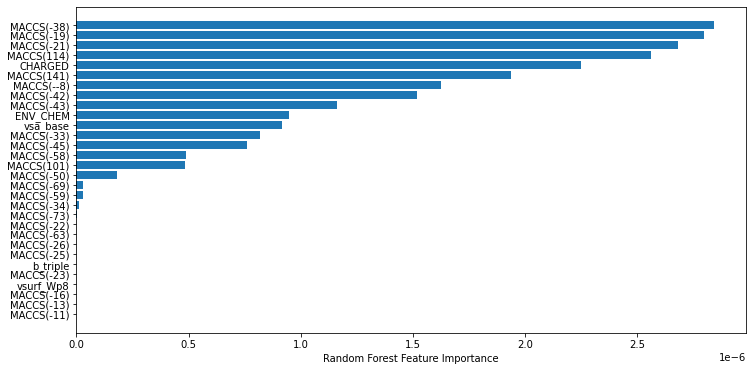

In [103]:
cols_name_arr=np.asarray(cols_name)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(cols_name_arr[sorted_idx][:30], rf.feature_importances_[sorted_idx][:30])
plt.xlabel("Random Forest Feature Importance")

In [106]:



from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X_train, y_train)
X_selected = select.transform(X_train)
print("X_selected.shape: {}".format(X_selected.shape))

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
percentile=5)),
("ridge", Ridge())])
print("Cross-validation accuracy (pipeline): {:.2f}".format(
np.mean(cross_val_score(pipe, X_train, y_train, cv=5))))

X_selected.shape: (146, 17)
Cross-validation accuracy (pipeline): 0.05


In [107]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

## Wrapper Method 
include rfe


In [108]:
## Forward Selection
# The main issues It does not consider all possible combination of potential predictors

In [116]:
# 1.

# https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features